# How do results change with population variations

In [2]:
import cogsworth
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import gala.dynamics as gd

In [3]:
import sys
sys.path.append("../src")
import plotting

In [4]:
import h5py as h5

In [5]:
%config InlineBackend.figure_format = 'retina'

pd.options.display.max_columns = 999

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [6]:
from importlib import reload
reload(plotting)

<module 'plotting' from '/mnt/home/twagg/supernova-feedback/notebooks/../src/plotting.py'>

# Read data

In [83]:
pop_details = {
    "file_names": ["fiducial", 
                   "porb-0", "porb-minus1", "q-plus1", "q-minus1",
                   "ce-0.1", "ce-10.0", "qcritB-0.0", "qcritB-1000.0",
                   "beta-0.0", "beta-0.5", "beta-1.0", "gamma-disc",
                   "ecsn-265", "no-fallback",
                   "alpha-vir-0.1", "alpha-vir-10.0",
                   "r-0.1", "r-1.0", "r-10.0", "r-100.0"],
    "labels": np.array(["Fiducial",
               r"$\pi = 0$", r"$\pi = -1$", r"$\kappa = 1$", r"$\kappa = -1$",
               r"$\alpha_{\rm CE} = 0.1$", r"$\alpha_{\rm CE} = 10.0$",
               "All Case B\nMT Unstable", "All Case B\nMT Stable",
               r"$\beta = 0.0$", r"$\beta = 0.5$",
               r"$\beta = 1.0$", r"$\gamma = \gamma_{\rm disc}$",
               r"$\sigma_{\rm low} = $" + "\n" + r"$265 \, {\rm km/s}$", "No fallback",
               r"$\alpha_{\rm vir} = 0.1$", r"$\alpha_{\rm vir} = 10.0$",
               r"$R = 0.1 \, {\rm pc}$", r"$R = 1 \, {\rm pc}$",
               r"$R = 10 \, {\rm pc}$", r"$R = 100 \, {\rm pc}$"]),
}

In [50]:
%%time
pops = {file_name: cogsworth.pop.load(f"/mnt/home/twagg/ceph/pops/feedback-variations/{file_name}.h5", parts=[])
        for file_name in pop_details["file_names"]}

CPU times: user 16.3 s, sys: 96.8 ms, total: 16.4 s
Wall time: 19.1 s


In [51]:
for p in pops:
    plotting.set_sn_subpop_masks(pops[p]);
    pops[p]._bpp = pd.read_hdf(f"/mnt/home/twagg/ceph/pops/feedback-variations/{p}.h5", key="bpp")

679 17143 11422 21970
597 19891 12762 15833
218 13355 9448 31216
992 17379 13302 22304
315 15815 8125 23062
679 15302 10641 26140
679 18964 14409 10281
679 17143 11422 21970
679 28251 18529 12205
679 16850 10369 13111
679 17293 11789 16631
679 17218 11731 23097
679 16125 10733 24549
679 17144 11834 21970
685 17114 11621 21970
679 17143 11422 21970
679 17143 11422 21970
679 17143 11422 21970
679 17143 11422 21970
679 17143 11422 21970
679 17143 11422 21970


In [52]:
for p in pops:
    f = np.load(f"/mnt/home/twagg/ceph/pops/feedback-variations/sn_positions-{p}.npz")
    pops[p].primary_sn_distances, pops[p].secondary_sn_distances = f["arr_0"] * u.kpc, f["arr_1"] * u.kpc

In [53]:
def merger_sn_fraction(p):
    return (p.sn_1_merger.sum() + p.sn_2_merger.sum()) / (p.sn_1_merger.sum() + p.sn_2_merger.sum() + p.sn_1.sum() + p.sn_2.sum() + p.sn_1_singles.sum() + p.sn_2_singles.sum())

def n_merger_sn(p):
    return (p.sn_1_merger.sum() + p.sn_2_merger.sum())

In [54]:
for p in pops:
    print(f"{p}   \t{merger_sn_fraction(pops[p]):1.2f}\t{n_merger_sn(pops[p])}")

fiducial   	0.43	21970
porb-0   	0.32	15833
porb-minus1   	0.58	31216
q-plus1   	0.41	22304
q-minus1   	0.49	23062
ce-0.1   	0.50	26140
ce-10.0   	0.23	10281
qcritB-0.0   	0.43	21970
qcritB-1000.0   	0.20	12205
beta-0.0   	0.32	13111
beta-0.5   	0.36	16631
beta-1.0   	0.44	23097
gamma-disc   	0.47	24549
ecsn-265   	0.43	21970
no-fallback   	0.43	21970
alpha-vir-0.1   	0.43	21970
alpha-vir-10.0   	0.43	21970
r-0.1   	0.43	21970
r-1.0   	0.43	21970
r-10.0   	0.43	21970
r-100.0   	0.43	21970


In [107]:
for p in pops:
    f_tail = (((pops[p].primary_sn_distances > 500 * u.pc).sum() + (pops[p].secondary_sn_distances > 500 * u.pc).sum())
              / (len(pops[p].sn_1) + len(pops[p].sn_2)))
    print(f"{p} \t\t {f_tail / 0.021:1.3f}")

fiducial 		 0.994
porb-0 		 1.246
porb-minus1 		 0.712
q-plus1 		 0.797
q-minus1 		 1.114
ce-0.1 		 0.730
ce-10.0 		 1.142
qcritB-0.0 		 0.994
qcritB-1000.0 		 2.599
beta-0.0 		 2.163
beta-0.5 		 1.640
beta-1.0 		 0.822
gamma-disc 		 0.829
ecsn-265 		 1.054
no-fallback 		 1.093
alpha-vir-0.1 		 0.973
alpha-vir-10.0 		 2.243
r-0.1 		 5.675
r-1.0 		 1.130
r-10.0 		 0.975
r-100.0 		 1.015


# Binary physics variations

In [131]:
bin_pop_file_names = ["fiducial", "ce-0.1", "ce-10.0",
                      "qcritB-0.0", "qcritB-1000.0",
                      "beta-0.0", "beta-0.5", "beta-1.0", "gamma-disc",
                      "ecsn-265", "no-fallback"]
bin_pops = {p:pops[p] for p in bin_pop_file_names}
bin_pop_labels = pop_details["labels"][np.isin(pop_details["file_names"], bin_pop_file_names)]

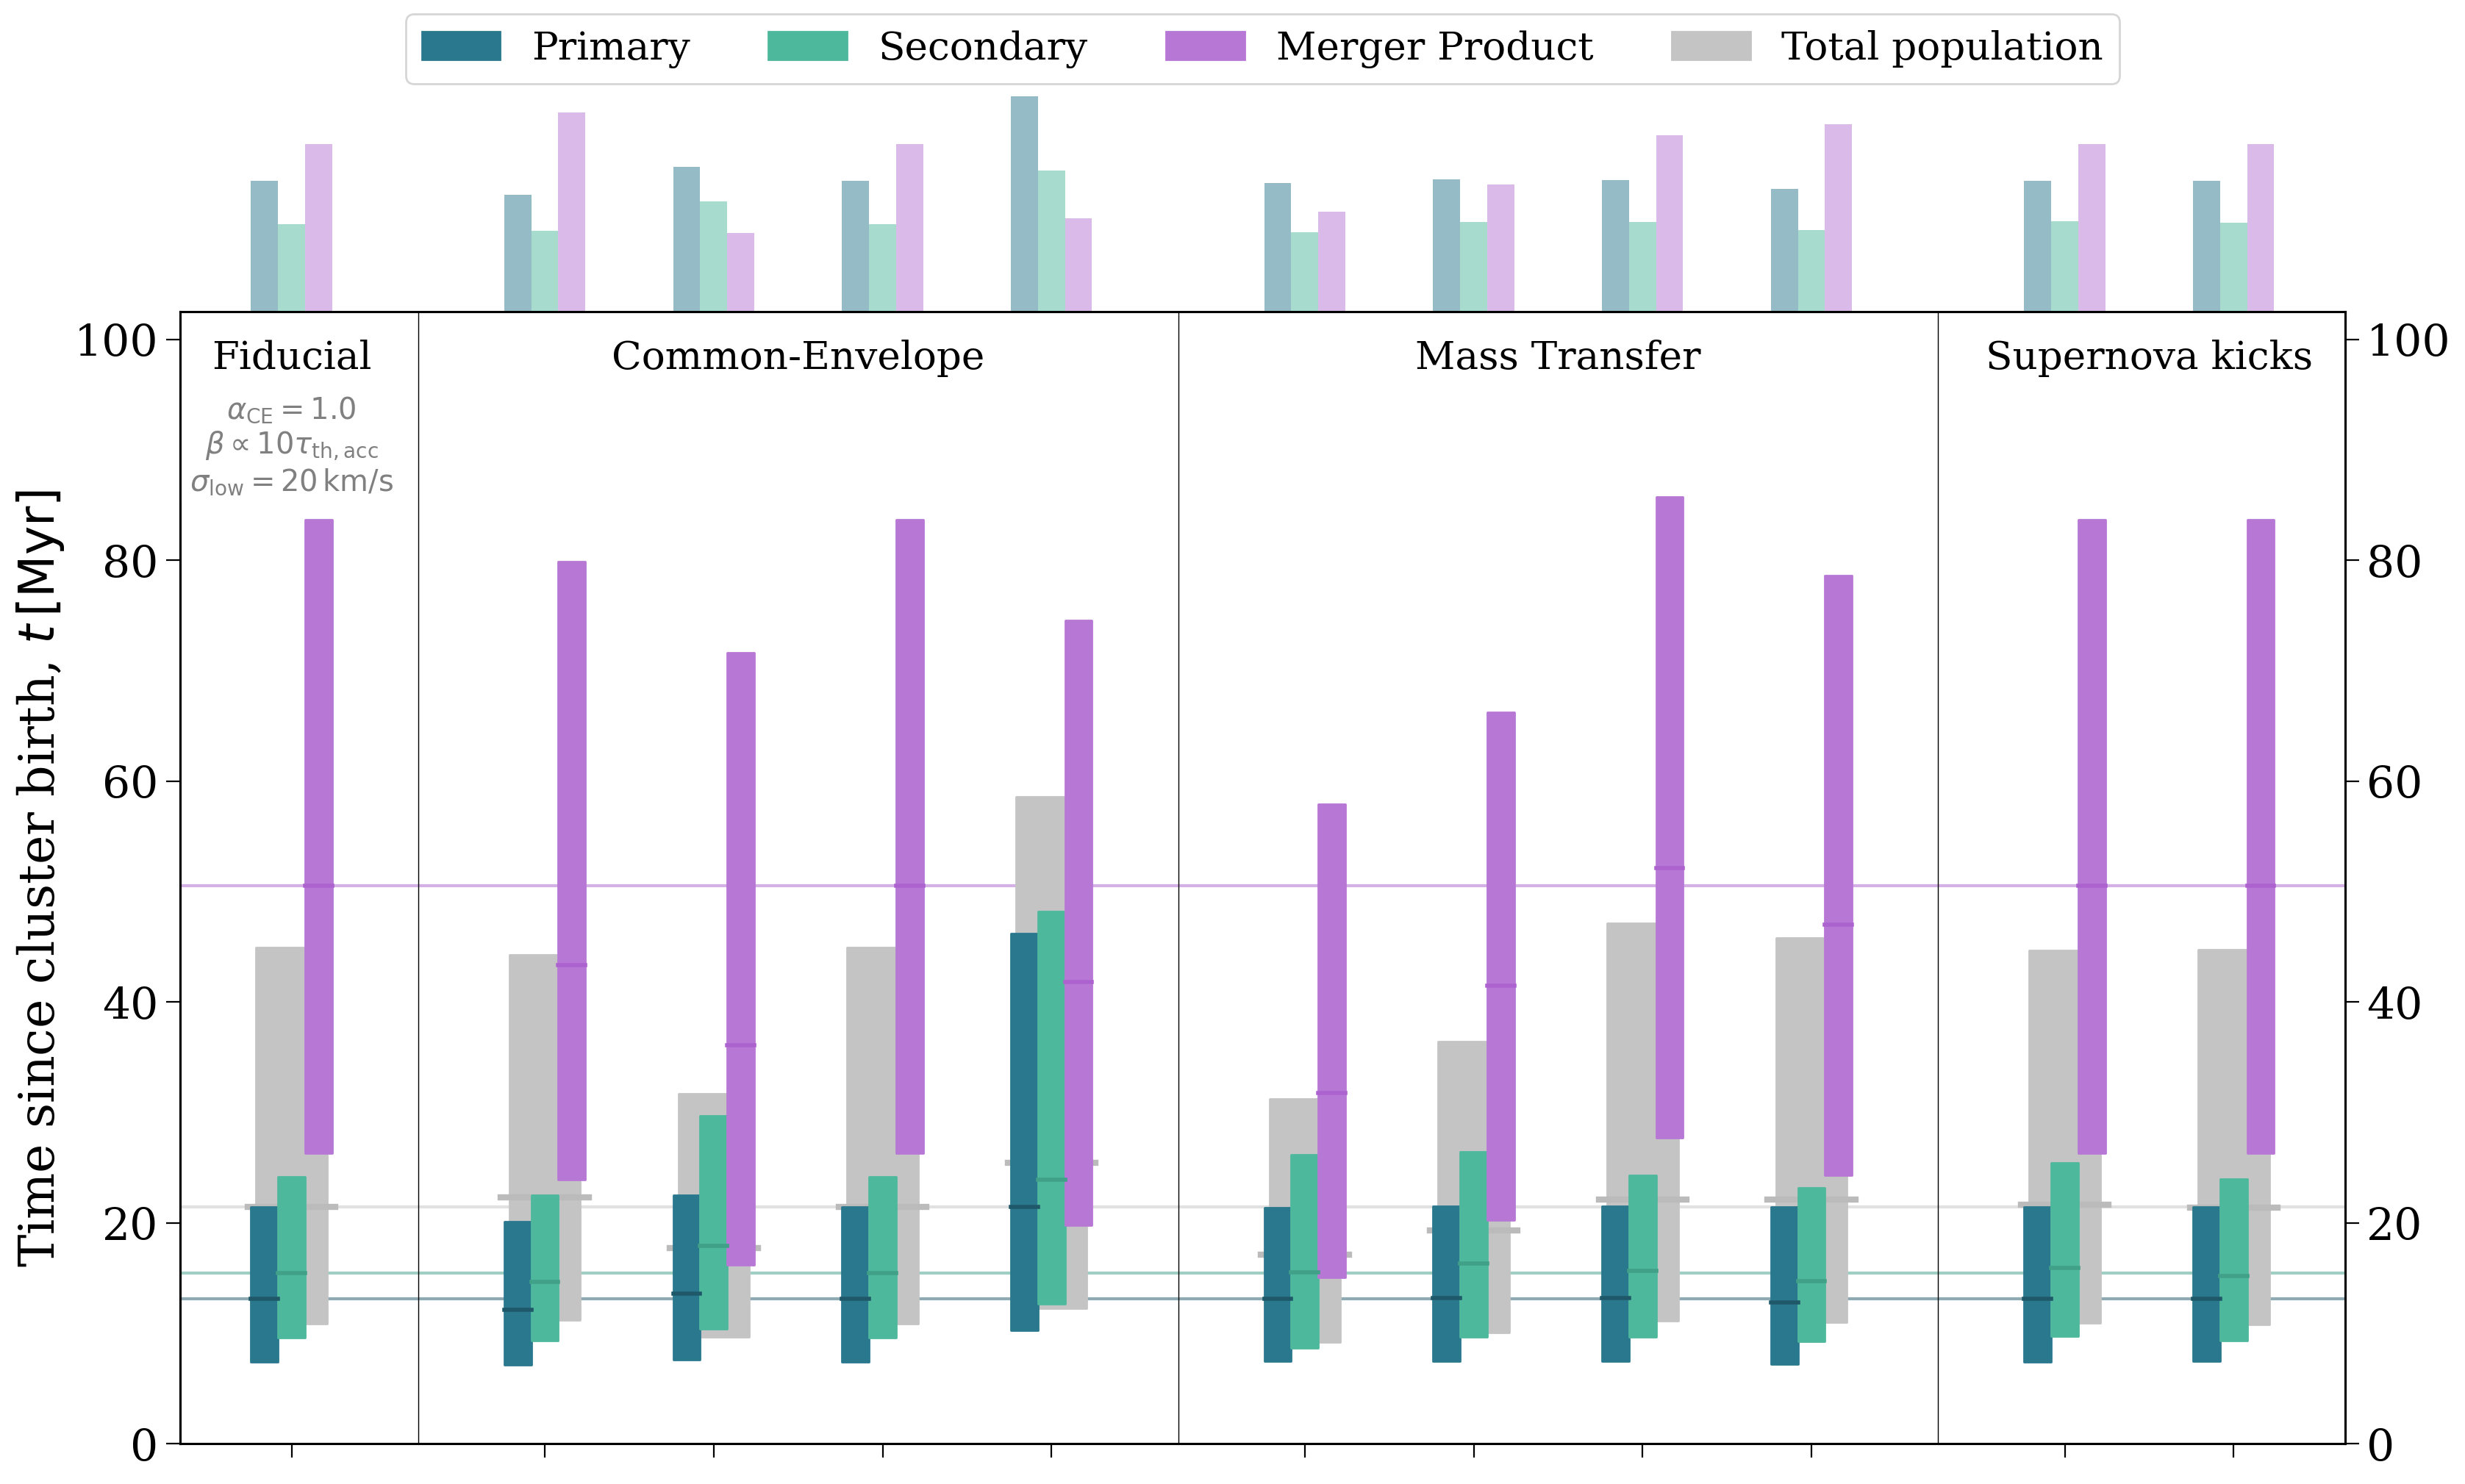

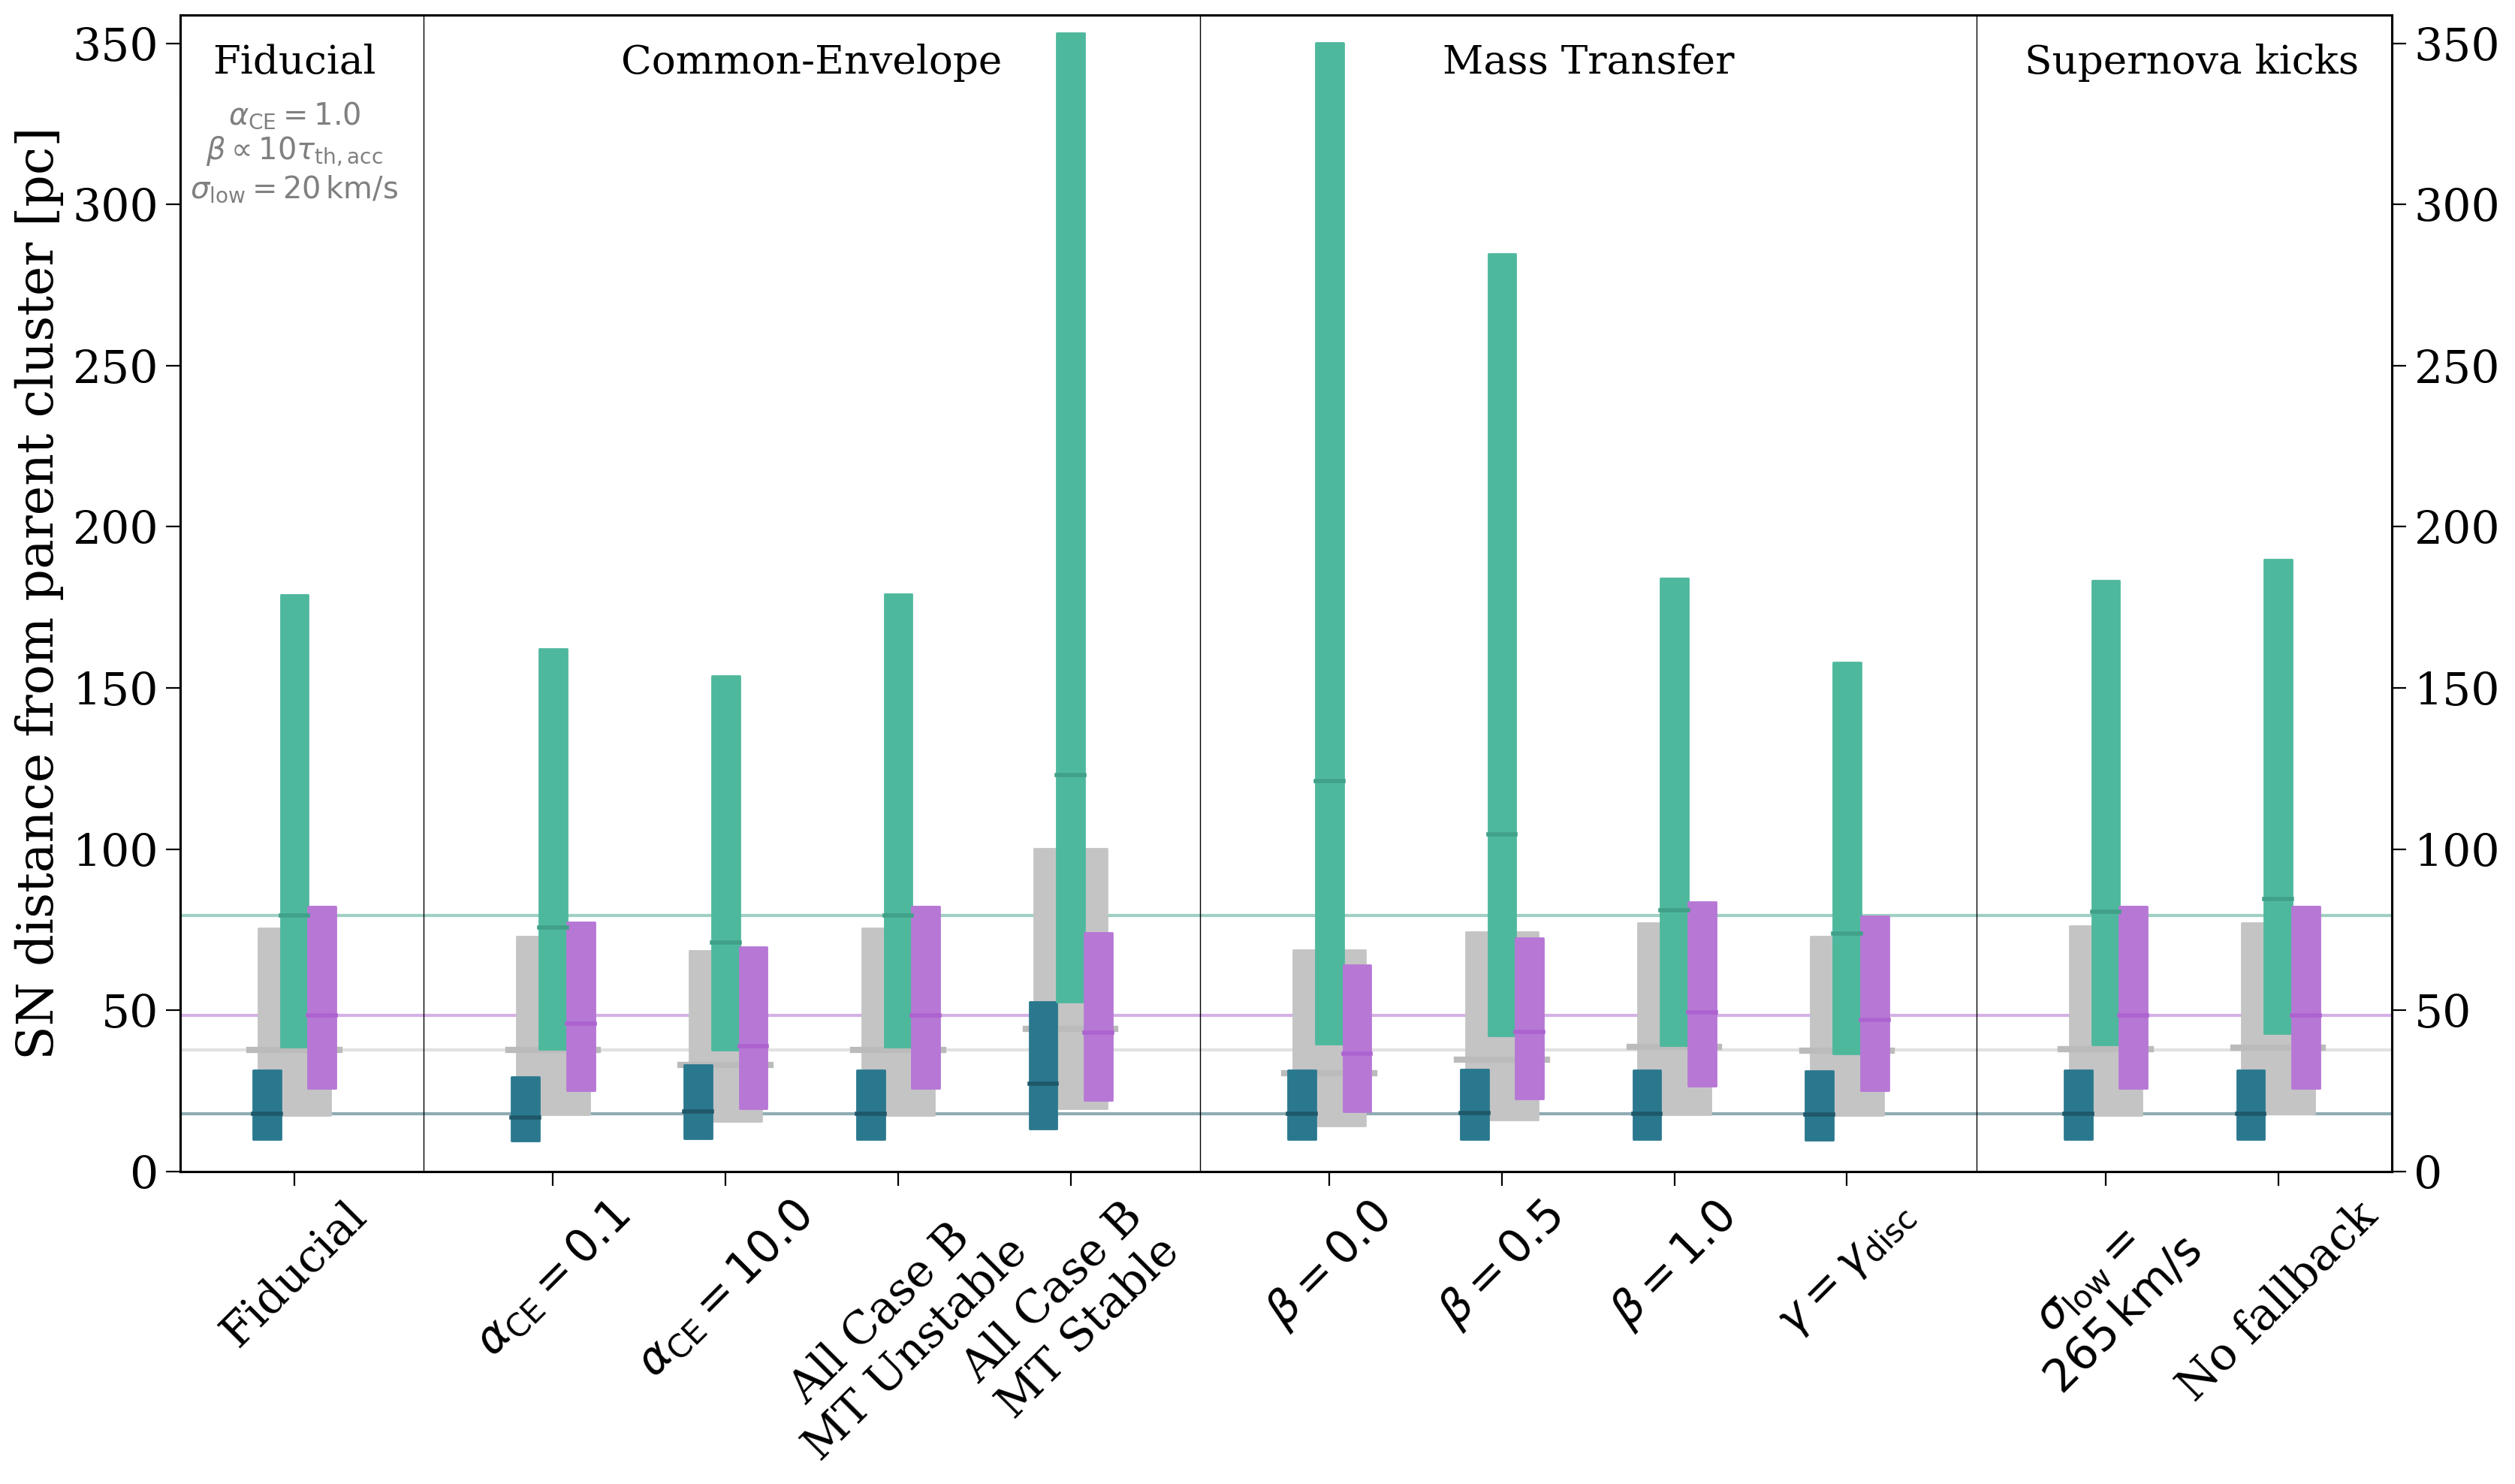

In [231]:
reload(plotting)
fig, ax = plotting.compare_variations(bin_pops, bin_pop_labels, quantity="time", annotate_loc=100,
                                      group_start_inds=[1,5,9],
                                    fiducial_settings=[r"$\alpha_{\rm CE} = 1.0$",
                                                       r"$\beta \propto 10 \tau_{\rm th, acc}$",
                                                       r"$\sigma_{\rm low} = 20 \, {\rm km/s}$"],
                                      show=False, show_labels=False)
plt.savefig("../plots/variations/var-bin-time.pdf", format="pdf", bbox_inches="tight")
plt.show()

reload(plotting)
fig, ax = plotting.compare_variations(bin_pops, bin_pop_labels, quantity="distance", annotate_loc=350,
                                      group_start_inds=[1,5,9],
                                    fiducial_settings=[r"$\alpha_{\rm CE} = 1.0$",
                                                       r"$\beta \propto 10 \tau_{\rm th, acc}$",
                                                       r"$\sigma_{\rm low} = 20 \, {\rm km/s}$"],
                                      show=False, show_rel_bars=False, show_legend=False)
plt.savefig("../plots/variations/var-bin-dist.pdf", format="pdf", bbox_inches="tight")
plt.show()

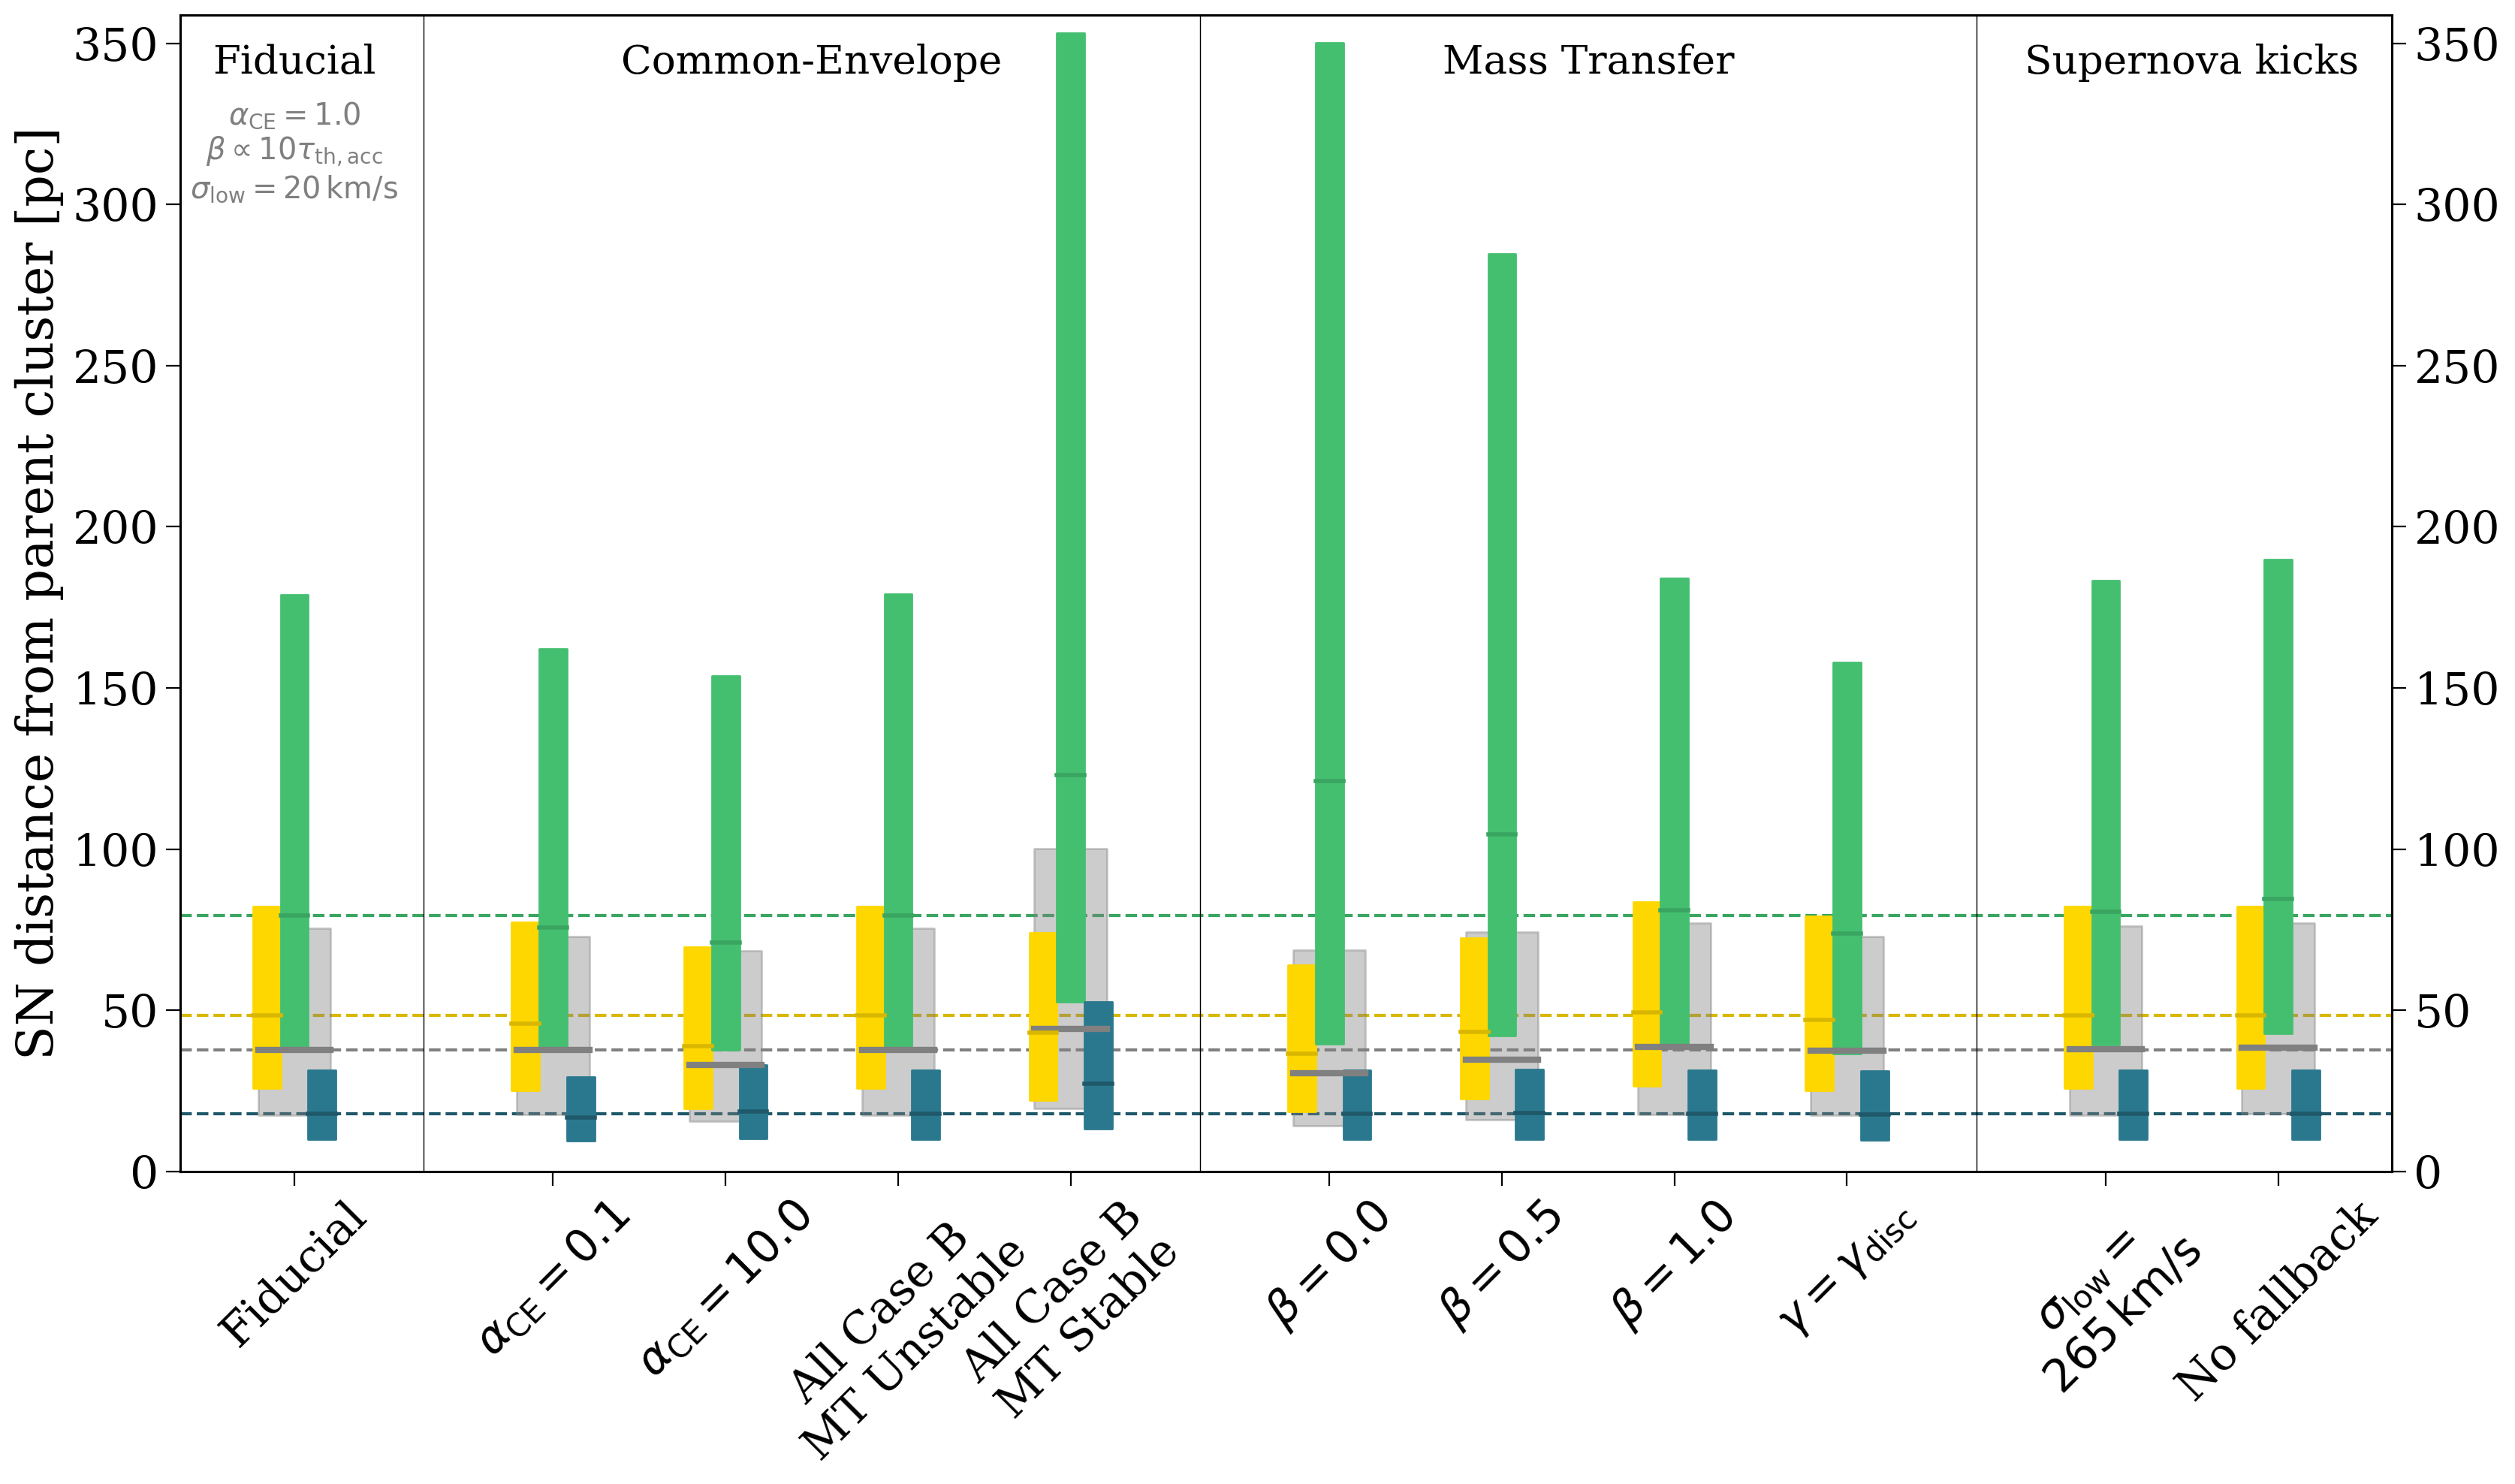

## Merger products

In [217]:
fid_mergers = np.concatenate((pops["fiducial"].sn_1_merger[pops["fiducial"].sn_1_merger].index,
                              pops["fiducial"].sn_2_merger[pops["fiducial"].sn_2_merger].index))

In [219]:
bet_mergers = np.concatenate((pops["beta-0.0"].sn_1_merger[pops["beta-0.0"].sn_1_merger].index,
                              pops["beta-0.0"].sn_2_merger[pops["beta-0.0"].sn_2_merger].index))

In [227]:
pops["fiducial"].bpp.loc[7886]

tphys      mass_1      mass_2  kstar_1  kstar_2         sep  \
7886    0.000000  118.740425   83.383153      1.0      1.0  121.358325   
7886    3.012812   77.394020   63.022682      1.0      1.0  144.894973   
7886    3.391660   72.245858   63.489252      2.0      1.0  143.791129   
7886    3.395166   69.619274   66.076395      4.0      1.0  144.049422   
7886    3.402364   32.011572  103.520018      4.0      1.0  244.061689   
7886    3.407350   31.945259  103.461485      7.0      1.0  244.120153   
7886    3.833955   12.303358   95.154838      8.0      1.0  308.357260   
7886    3.850737   11.951413   94.842851      8.0      1.0  310.276861   
7886    3.850737    9.041041   94.842851     14.0      1.0  314.154503   
7886    4.931062    9.041167   61.938721     14.0      2.0  459.844845   
7886    4.932440    9.041636   61.767227     14.0      2.0  441.552576   
7886    4.932440    9.041636   61.767227     14.0      2.0  441.552576   
7886    4.932440   12.303358    9.041636     15.0     14.0    0.000000   
7886  271.981427    0.000000    9.041636     15.0     14.0    0.000000   

            porb       ecc        RRLO_1    RRLO_2  evol_type      aj_1  \
7886   10.898533  0.278349  5.499982e-01  0.505429        1.0  0.000000   
7886   17.058575  0.000000  1.000281e+00  0.682624        3.0  3.170209   
7886   17.152373  0.000000  1.405038e+00  0.902705        2.0  3.617046   
7886   17.201109  0.000000  5.442081e+01  0.789052        2.0  3.620552   
7886   37.957824  0.000000  8.266488e-01  0.267554        4.0  3.627750   
7886   37.988965  0.000000  2.756007e-02  0.267850        2.0  0.010350   
7886   60.538779  0.000000  1.549446e-02  0.210114        2.0  0.563706   
7886   61.294609  0.000000  1.549446e-02  0.210114       15.0  0.580230   
7886   63.315930  0.041608  6.243954e-07  0.207542        2.0  0.000000   
7886  135.650528  0.041551  3.773407e-07  0.258354        2.0  1.080325   
7886  127.791505  0.000000  3.763627e-07  1.001000        3.0  1.081703   
7886  127.791505  0.000000  3.763627e-07  1.001000        7.0  1.081703   
7886    0.000000  0.000000  3.763627e-07  1.001000        8.0  1.081703   
7886    0.000000 -1.000000 -1.000000e+00  0.000100       10.0  1.081703   

            aj_2         tms_1         tms_2    massc_1    massc_2  \
7886    0.000000  3.243740e+00  3.478185e+00   0.000000   0.000000   
7886    3.160995  3.546448e+00  3.782246e+00   0.000000   0.000000   
7886    3.407612  3.617046e+00  3.772372e+00  31.108809   0.000000   
7886    3.232339  3.617046e+00  3.720889e+00  31.732627   0.000000   
7886    1.845725  3.617046e+00  3.319809e+00  31.858327   0.000000   
7886    1.850905  3.311089e-01  3.320157e+00   0.000000   0.000000   
7886    2.311813  5.637060e-01  3.375231e+00   8.703957   0.000000   
7886    2.329901  5.637060e-01  3.377506e+00   9.152522   0.000000   
7886    2.330183  5.637060e-01  3.377542e+00   9.041041   0.000000   
7886    3.805937  1.000000e+10  3.805937e+00   9.041167  25.269594   
7886    3.807316  1.000000e+10  3.805937e+00   9.041636  25.453051   
7886    3.807316  1.000000e+10  3.805937e+00   9.041636  25.453051   
7886    0.000000  1.000000e+10  3.805937e+00   0.000000   9.041636   
7886  267.048986  1.000000e+10  1.000000e+10   0.000000   9.041636   

            rad_1       rad_2     mass0_1     mass0_2         lum_1  \
7886    19.742028   15.437802  118.740425   83.383153  1.700492e+06   
7886    57.514021   35.733821   77.394020   63.022682  1.633653e+06   
7886    78.823838   47.739548   72.245858   63.489252  1.703362e+06   
7886  3005.976753   42.556105   72.245858   66.076395  1.593178e+06   
7886    57.157495   31.520592   72.245858  103.520018  1.570040e+06   
7886     1.905297   31.571632   31.945259  103.461485  1.009306e+06   
7886     1.063930   36.117522   12.303358   95.154838  2.997398e+05   
7886     1.127218   36.360170   12.303358   94.842851  3.853582e+05   
7886     0.000038   36.364019   12.303358   94.842851  1.000000e-10   
7886     0.00

In [228]:
pops["beta-0.0"].bpp.loc[7886]

tphys      mass_1     mass_2  kstar_1  kstar_2         sep  \
7886    0.000000  118.740425  83.383153      1.0      1.0  121.358325   
7886    3.012812   77.394020  63.022682      1.0      1.0  144.894973   
7886    3.369657   72.875182  61.401278      1.0      1.0  144.932652   
7886    3.369657  134.276460   0.000000      1.0     15.0    0.000000   
7886    3.483881  117.142891   0.000000      2.0     15.0    0.000000   
7886    3.486514  116.747957   0.000000      4.0     15.0    0.000000   
7886    3.793566   71.051489   0.000000      7.0     15.0    0.000000   
7886    3.824941   50.204587   0.000000      7.0     15.0    0.000000   
7886    3.824941   44.500000   0.000000     14.0     15.0    0.000000   
7886  271.981427   44.500000   0.000000     14.0     15.0    0.000000   

           porb       ecc    RRLO_1    RRLO_2  evol_type        aj_1  \
7886  10.898533  0.278349  0.549998  0.505429        1.0    0.000000   
7886  17.058575  0.000000  1.000281  0.682624        3.0    3.170209   
7886  17.451051  0.000000  1.941592  1.004288        5.0    3.585770   
7886   0.000000 -1.000000  0.000000 -1.000000        6.0    3.074834   
7886   0.000000 -1.000000  0.000100 -1.000000        2.0    3.250554   
7886   0.000000 -1.000000  0.000100 -1.000000        2.0    3.253187   
7886   0.000000 -1.000000  0.000100 -1.000000        2.0    0.191637   
7886   0.000000 -1.000000  0.000100 -1.000000       15.0    0.262572   
7886   0.000000 -1.000000  0.000100 -1.000000        2.0    0.000000   
7886   0.000000 -1.000000  0.000100 -1.000000       10.0  268.156486   

          aj_2         tms_1     tms_2    massc_1  massc_2        rad_1  \
7886  0.000000  3.243740e+00  3.478185   0.000000      0.0    19.742028   
7886  3.160995  3.546448e+00  3.782246   0.000000      0.0    57.514021   
7886  3.549310  3.607720e+00  3.818090   0.000000      0.0   110.825728   
7886  3.549310  3.607720e+00  3.818090   0.000000      0.0   110.825728   
7886  3.549310  3.250554e+00  3.818090  59.754361      0.0   175.233074   
7886  3.549310  3.250554e+00  3.818090  60.949287      0.0  4387.637770   
7886  3.549310  2.202730e-01  3.818090   0.000000      0.0     3.079884   
7886  3.549310  2.625720e-01  3.818090   0.000000      0.0     2.498201   
7886  3.549310  2.625725e-01  3.818090  44.500000      0.0     0.000189   
7886  3.549310  1.000000e+10  3.818090  44.500000      0.0     0.000189   

          rad_2     mass0_1    mass0_2         lum_1         lum_2  \
7886  15.437802  118.740425  83.383153  1.700492e+06  9.333771e+05   
7886  35.733821   77.394020  63.022682  1.633653e+06  1.051868e+06   
7886  53.009017   72.875182  61.401278  1.637352e+06  1.098376e+06   
7886  53.009017  134.276460  61.401278  1.637352e+06  1.098376e+06   
7886  53.009017  117.142891  61.401278  4.126072e+06  1.098376e+06   
7886  53.009017  117.142891  61.401278  3.840055e+06  1.098376e+06   
7886  53.009017   71.051489  61.401278  4.174610e+06  1.098376e+06   
7886  53.009017   50.204587  61.401278  2.730027e+06  1.098376e+06   
7886  53.009017   50.204587  61.401278  1.000000e-10  1.098376e+06   
7886  53.009017   50.204587  61.401278  1.000000e-10  1.098376e+06   

             teff_1        teff_2    radc_1  radc_2        menv_1  \
7886   47121.311349  45866.030268  0.000000     0.0  1.000000e-10   
7886   27332.081555  31061.343402  0.000000     0.0  1.000000e-10   
7886   19700.842859  25779.973121  0.000000     0.0  1.000000e-10   
7886   19700.842859  25779.973121  0.000000     0.0  1.000000e-10   
7886   19739.937308  25779.973121  2.774761     0.0  1.000000e-10   
7886    3874.704517  25779.973121  2.808070     0.0  2.567861e+01   
7886  149333.205030  25779.973121  0.000000     0.0  7.105149e+01   
7886  149106.859725  25779.973121  0.000000     0.0  5.020477e+01   
7886    1334.770738  25779.973121  0.000189     0.0  1.000000e-10   
7886    1334.770738  25779.973121  0.000189     0.0  1.000000e-10   

            menv_2        renv_1        renv_2  omega_spi

In [222]:
bet_mergers[~np.isin(bet_mergers, fid_mergers)]

array([  6943,   7886,   7914,  12425,  20004,  23727,  34038,  38201,
        42821,  44799,  46146,  49349,  64285,  64324,  66049,  66077,
        68527,  71736,  73062,  73376,  81404,  83720,  88710,  91951,
        92368,  92761, 101678, 101691, 101939, 112123, 112144, 113874,
       115791, 118087, 119692, 120168, 124620, 124936, 129298, 129308,
       131833, 137873, 139663, 140572, 140889, 160256, 163031, 181488,
       184849, 187340, 191246, 199860, 200791, 207654, 210571, 211484,
       211518, 215327, 217536, 233031, 234491, 235434, 256403, 261861,
       262153, 263601, 263622, 279363, 282366, 288298, 290167, 309829,
       309855, 312399, 315651, 317698, 323926, 323958, 325511, 326505,
       326743, 328203, 330357, 332147, 332165, 338520, 339151, 341580,
       345282, 345785, 346336, 347103, 351436, 352194, 357941, 366542,
       366557, 369353, 375076, 376136, 377029, 378933, 381741, 384785,
       385470, 390548, 396838, 399401, 416868, 425322, 427101, 430518,
      

/tmp/ipykernel_2048269/1990248453.py:12: RuntimeWarning: invalid value encountered in divide
  plt.plot(bin_centres, counts / f_counts, label=p, marker="o")


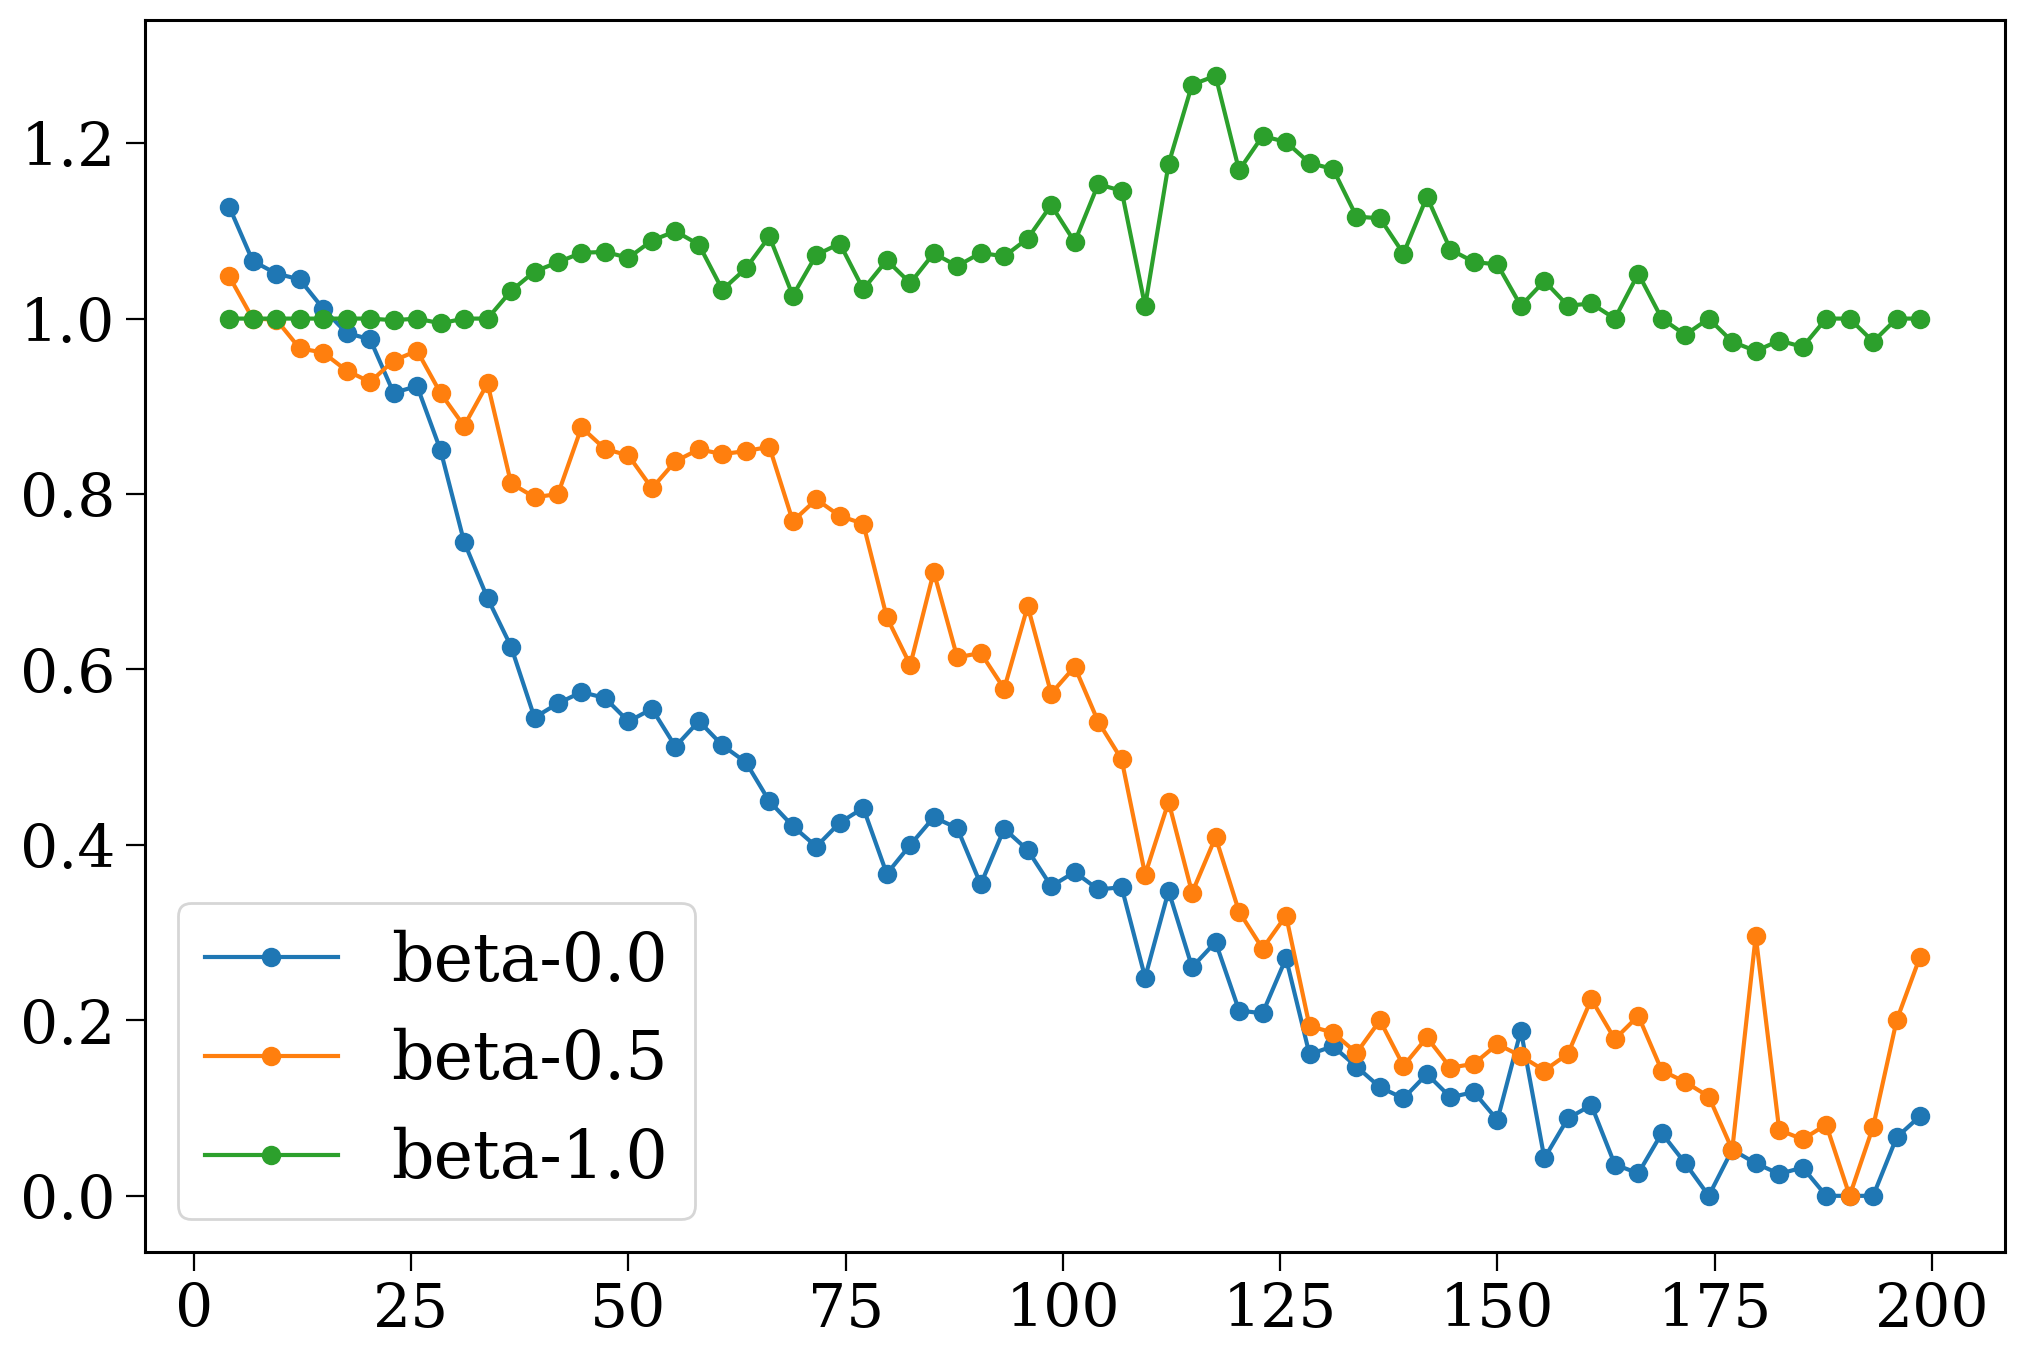

In [200]:
for p in ["fiducial", "beta-0.0", "beta-0.5", "beta-1.0"]:
    sn_time_1 = pops[p].bpp["tphys"][(pops[p].bpp["evol_type"] == 15) & (~pops[p].bpp["bin_num"].isin(pops[p].duplicate_sn))]
    sn_time_2 = pops[p].bpp["tphys"][(pops[p].bpp["evol_type"] == 16) & (~pops[p].bpp["bin_num"].isin(pops[p].duplicate_sn))]
    sn_merger_time = np.concatenate((sn_time_1[pops[p].sn_1_merger], sn_time_2[pops[p].sn_2_merger]))

    if p == "fiducial":
        f_counts, f_bins = np.histogram(sn_merger_time, bins=np.linspace(0, 200, 75))
    else:
        counts, bins = np.histogram(sn_merger_time, bins=np.linspace(0, 200, 75))
        bin_centres = np.array([(bins[i] + bins[i + 1]) / 2. for i in range(len(bins) - 1)])
        
        plt.plot(bin_centres, counts / f_counts, label=p, marker="o")

plt.legend()
plt.show()

## Detailed plots

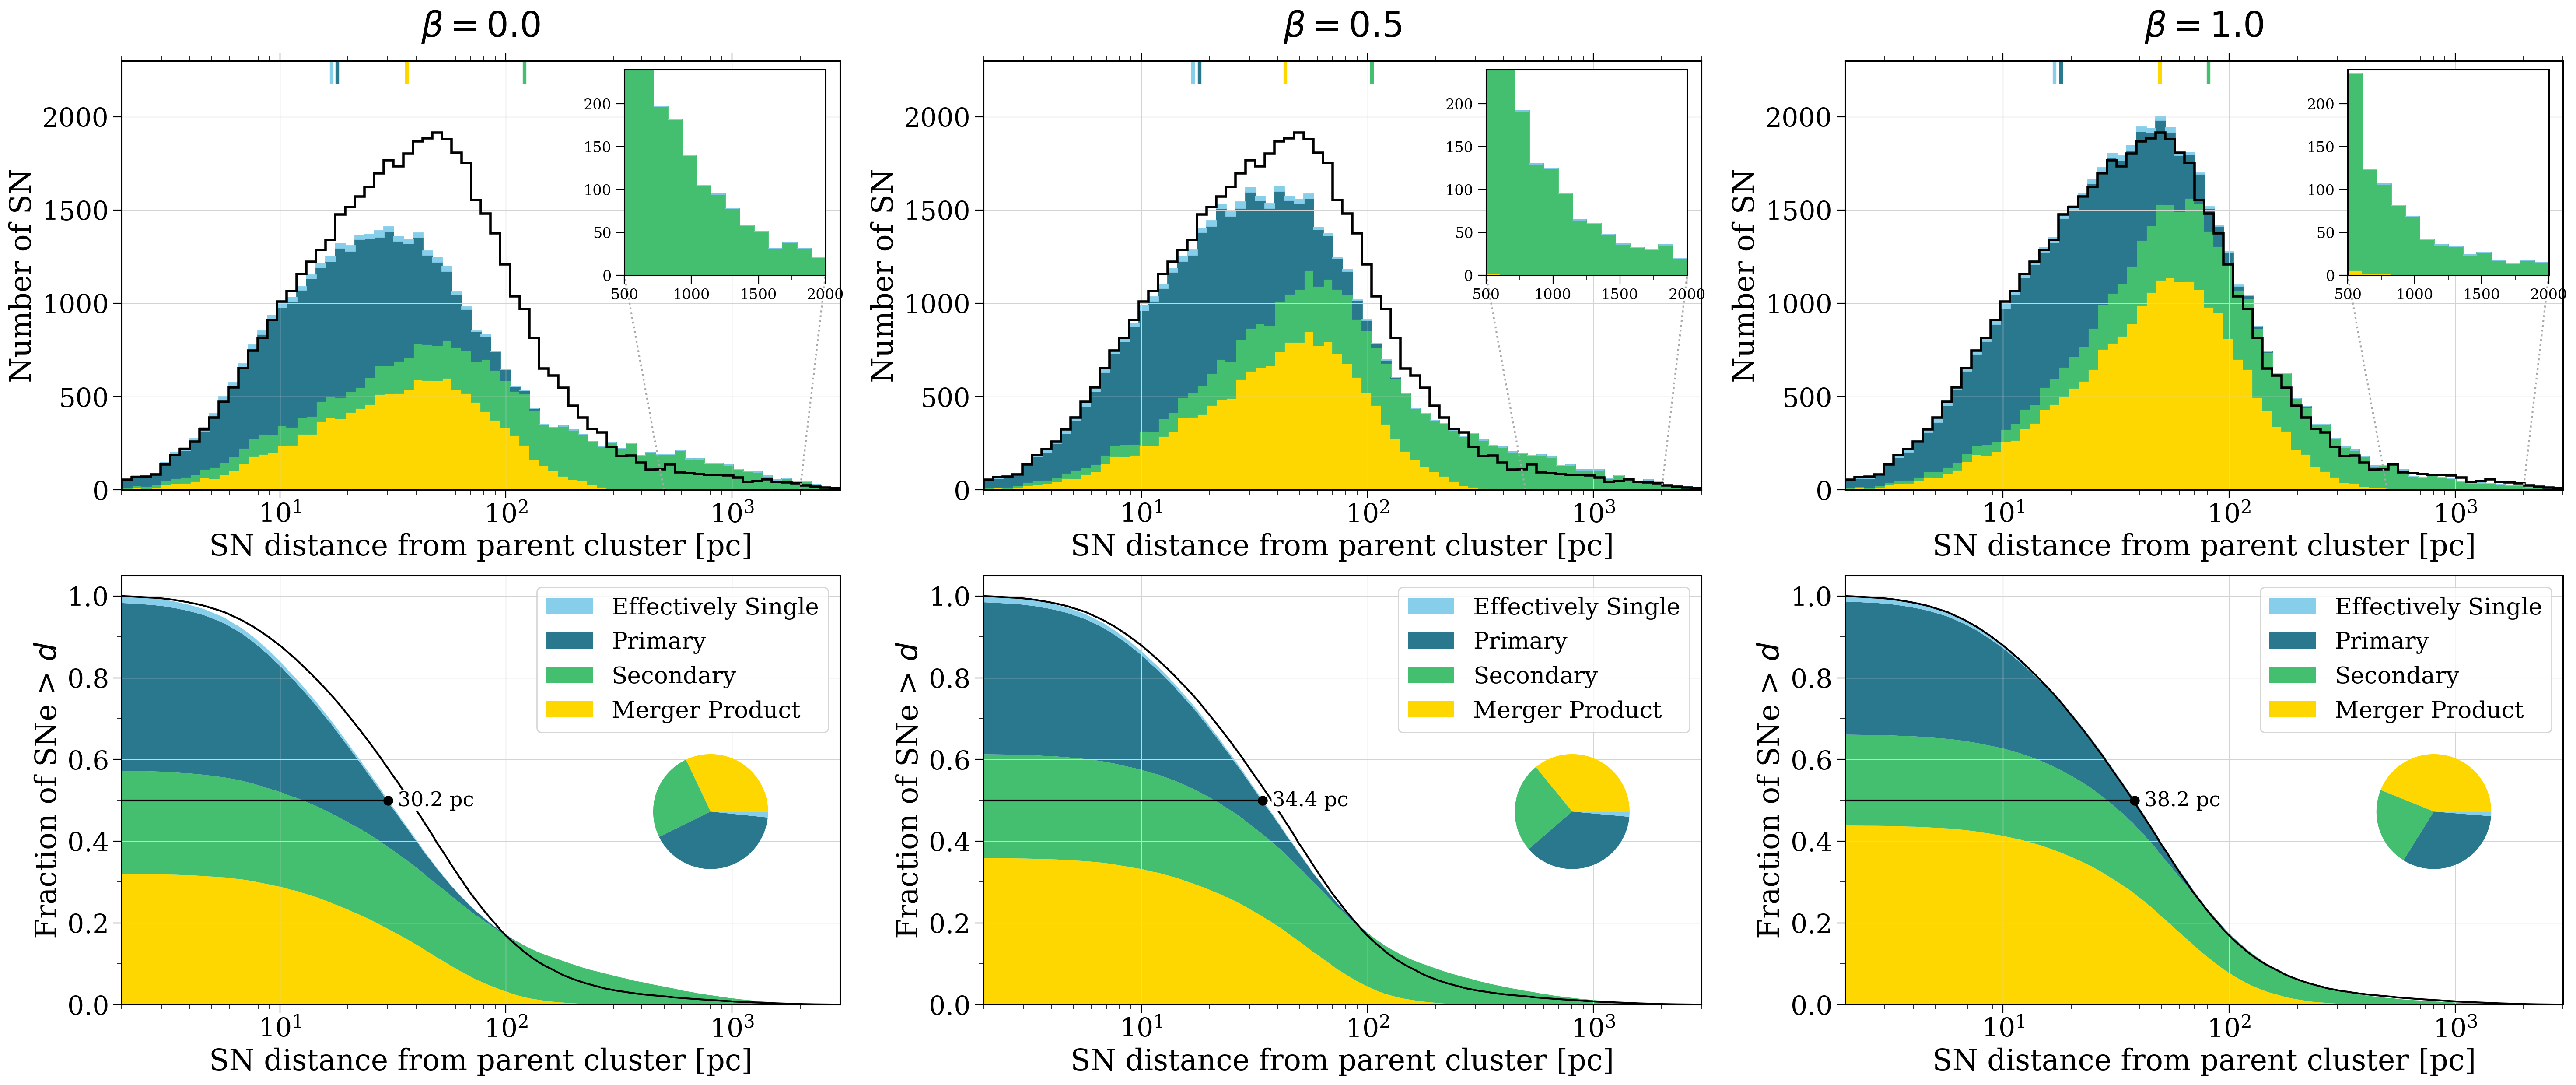

In [15]:
reload(plotting)
fig, axes = plt.subplots(2, 3, figsize=(36, 14))

for p, x, l in zip(["beta-0.0", "beta-0.5", "beta-1.0"],
                   [axes[:, 0], axes[:, 1], axes[:, 2]],
                   [r"$\beta = 0.0$", r"$\beta = 0.5$", r"$\beta = 1.0$"]):
    plotting.sandpile(pops[p], bins=np.geomspace(2e0, 3e3, 75),
                      comparison_pop=pops["fiducial"],
                      top_ax_dict={"ylim": (0, 2300)},
                      inset_ax_dict={"ylim": (0, 240)}, fig=fig, axes=x, show=False)
    x[0].set_title(l, fontsize=1.2 * fs, pad=20)
plt.show()

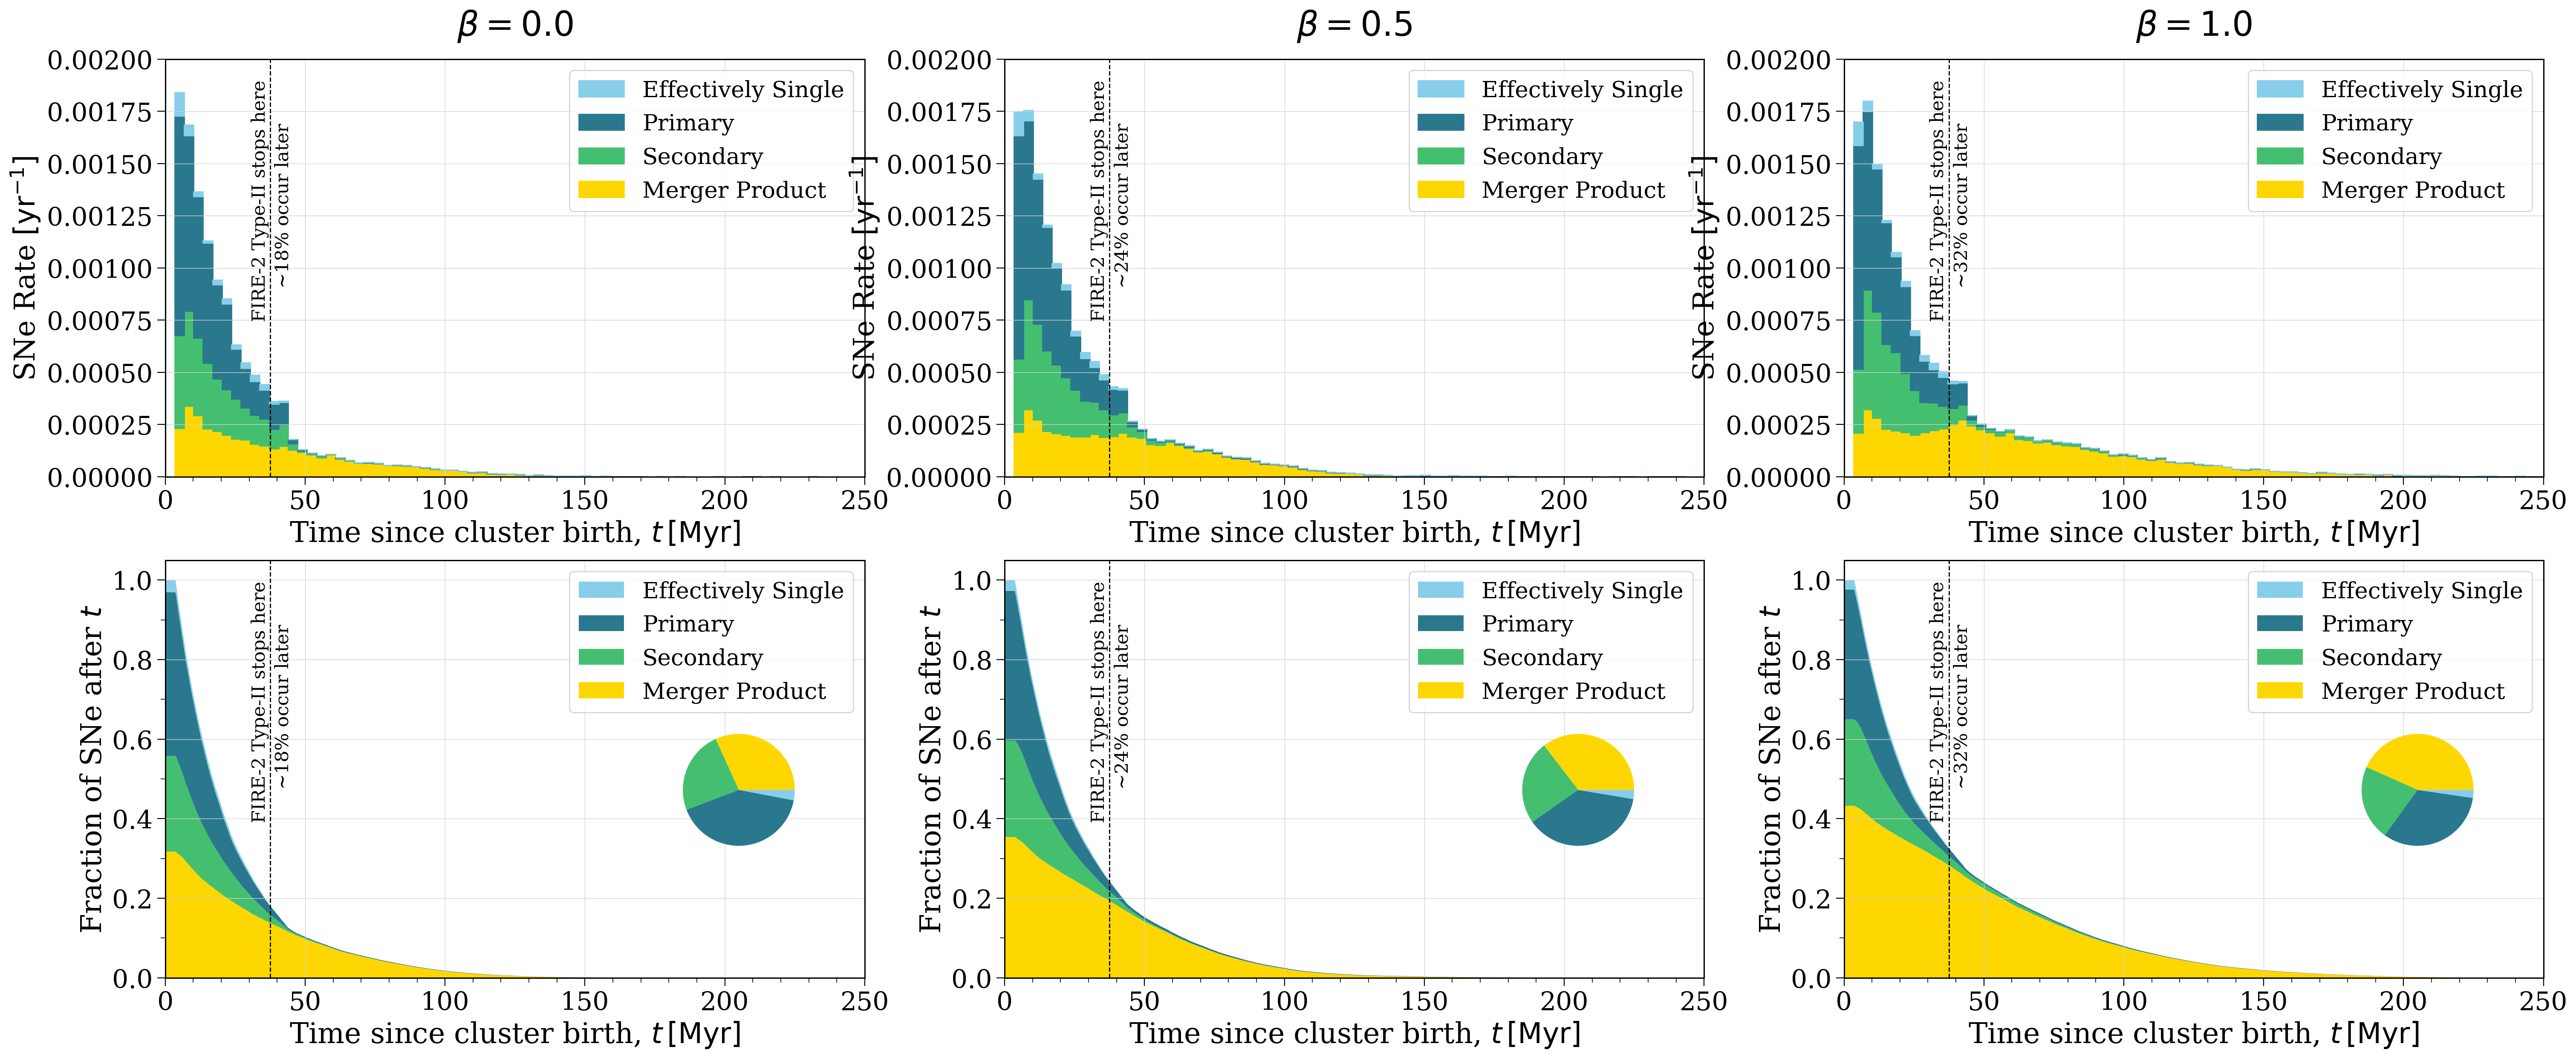

In [137]:
reload(plotting)
fig, axes = plt.subplots(2, 3, figsize=(36, 14))

for p, x, l in zip(["beta-0.0", "beta-0.5", "beta-1.0"],
                   [axes[:, 0], axes[:, 1], axes[:, 2]],
                   [r"$\beta = 0.0$", r"$\beta = 0.5$", r"$\beta = 1.0$"]):
    plotting.sandpile(pops[p], bins=np.linspace(0, 250, 75),
                      # comparison_pop=pops["fiducial"],
                      var="time",
                      top_ax_dict={"ylim": (0, 0.002)}, fig=fig, axes=x, show=False)
    x[0].set_title(l, fontsize=1.2 * fs, pad=20)
plt.show()

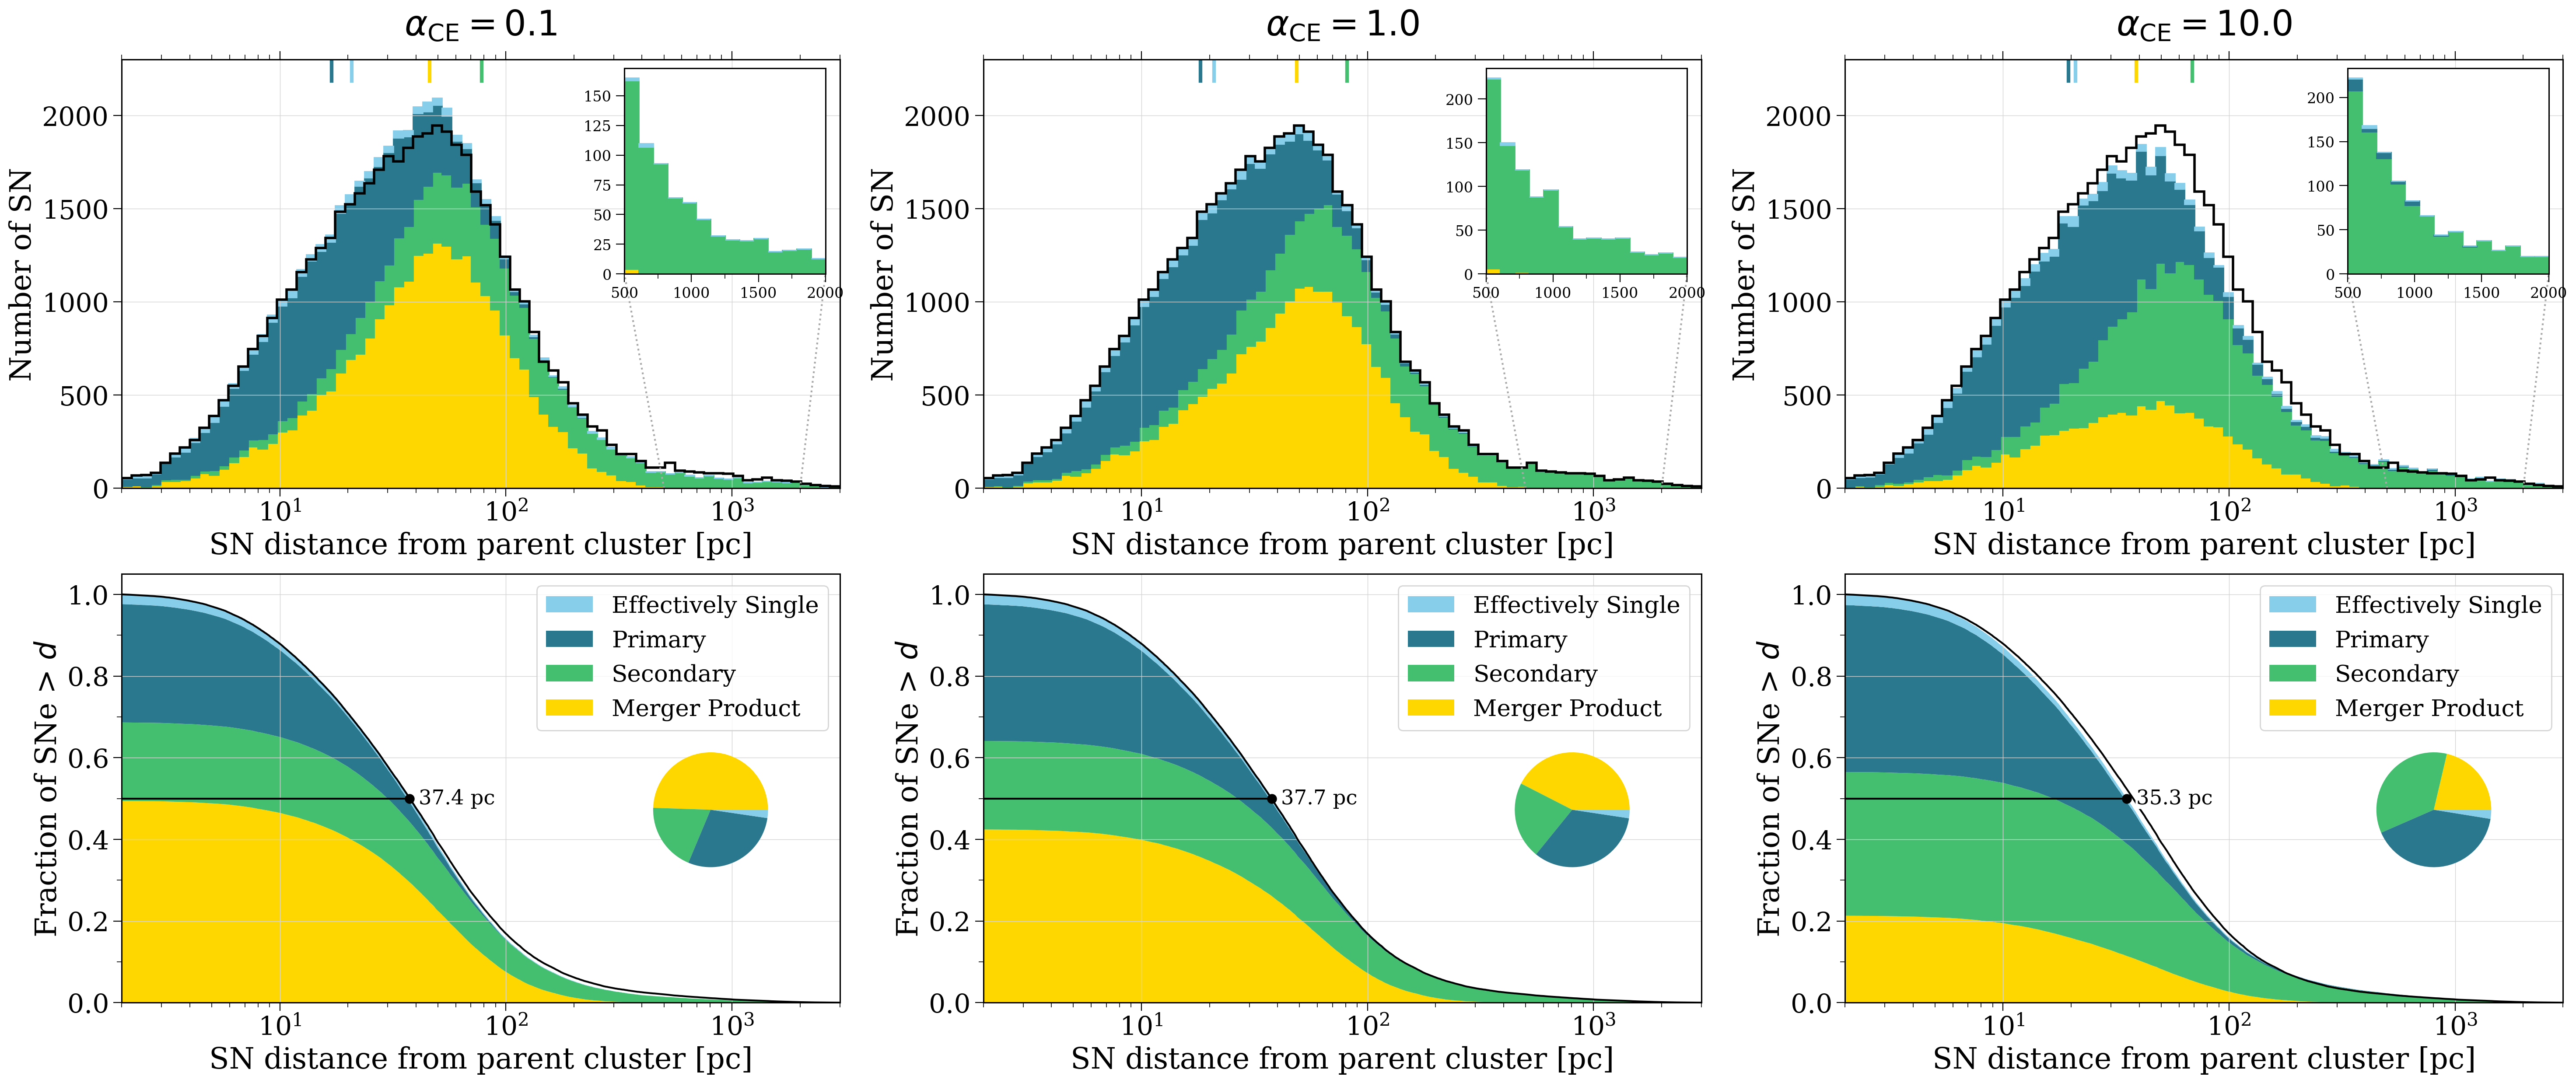

In [229]:
fig, axes = plt.subplots(2, 3, figsize=(36, 14))

for p, x, l in zip(["ce-0.1", "fiducial", "ce-10.0"],
                   [axes[:, 0], axes[:, 1], axes[:, 2]],
                   [r"$\alpha_{\rm CE} = 0.1$", r"$\alpha_{\rm CE} = 1.0$", r"$\alpha_{\rm CE} = 10.0$"]):
    plotting.sandpile(pops[p], bins=np.geomspace(2e0, 3e3, 75),
                      comparison_pop=pops["fiducial"],
                      top_ax_dict={"ylim": (0, 2300)}, fig=fig, axes=x, show=False)
    x[0].set_title(l, fontsize=1.2 * fs, pad=20)
plt.show()

In [43]:
reload(plotting)

<module 'plotting' from '/mnt/home/twagg/supernova-feedback/notebooks/../src/plotting.py'>

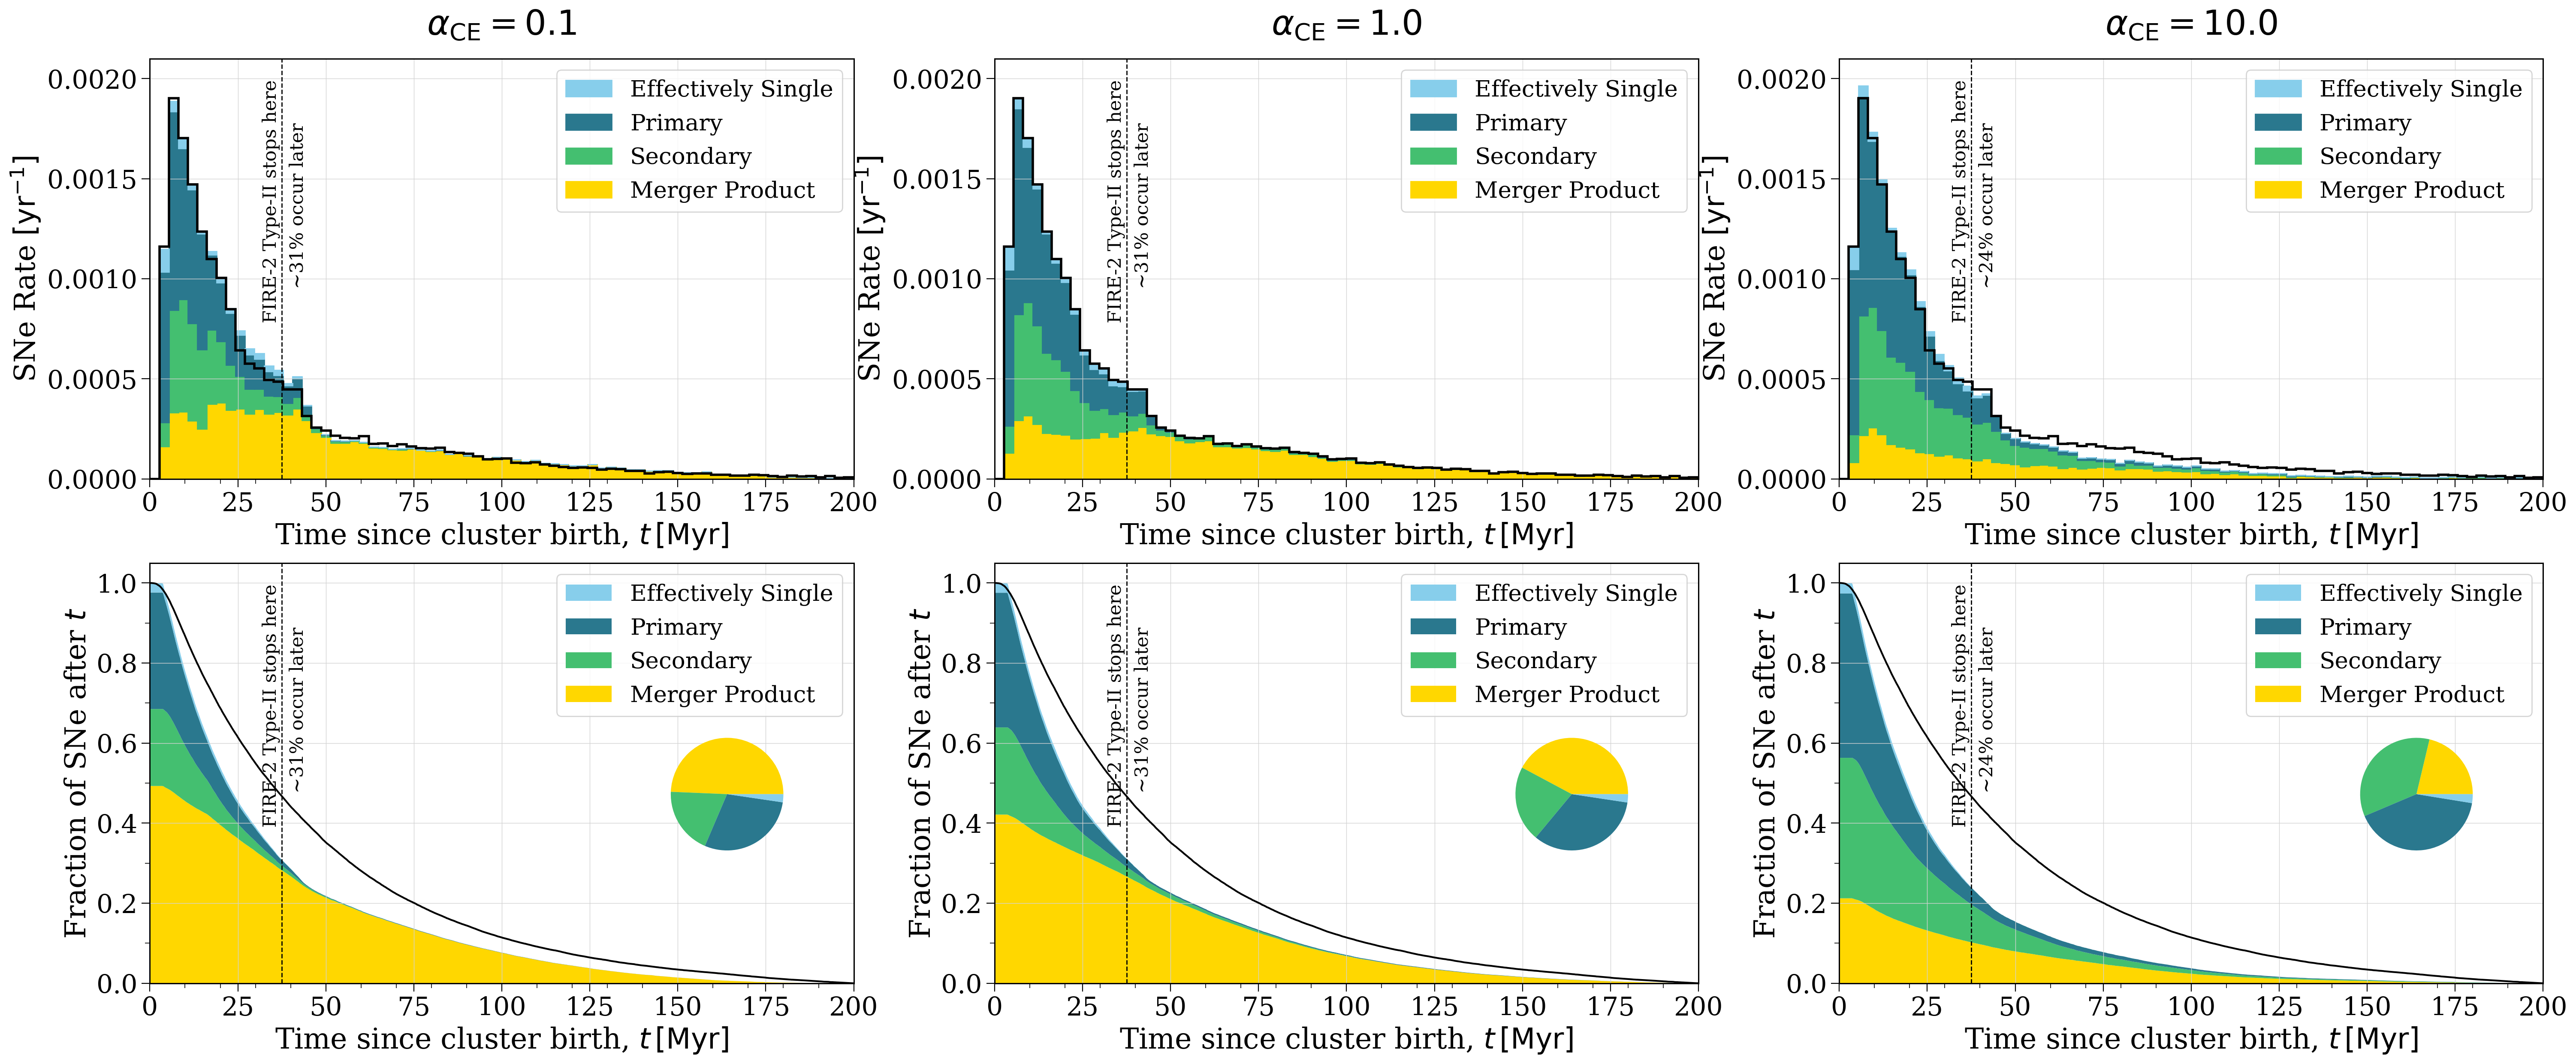

In [47]:
fig, axes = plt.subplots(2, 3, figsize=(36, 14))

for p, x, l in zip(["ce-0.1", "fiducial", "ce-10.0"],
                   [axes[:, 0], axes[:, 1], axes[:, 2]],
                   [r"$\alpha_{\rm CE} = 0.1$", r"$\alpha_{\rm CE} = 1.0$", r"$\alpha_{\rm CE} = 10.0$"]):
    plotting.sandpile(pops[p], bins=np.linspace(0, 200, 75),var="time",
                      comparison_pop=pops["fiducial"], 
                      top_ax_dict={"ylim": (0, 0.0021)}, fig=fig, axes=x, show=False)
    x[0].set_title(l, fontsize=1.2 * fs, pad=20)
plt.show()

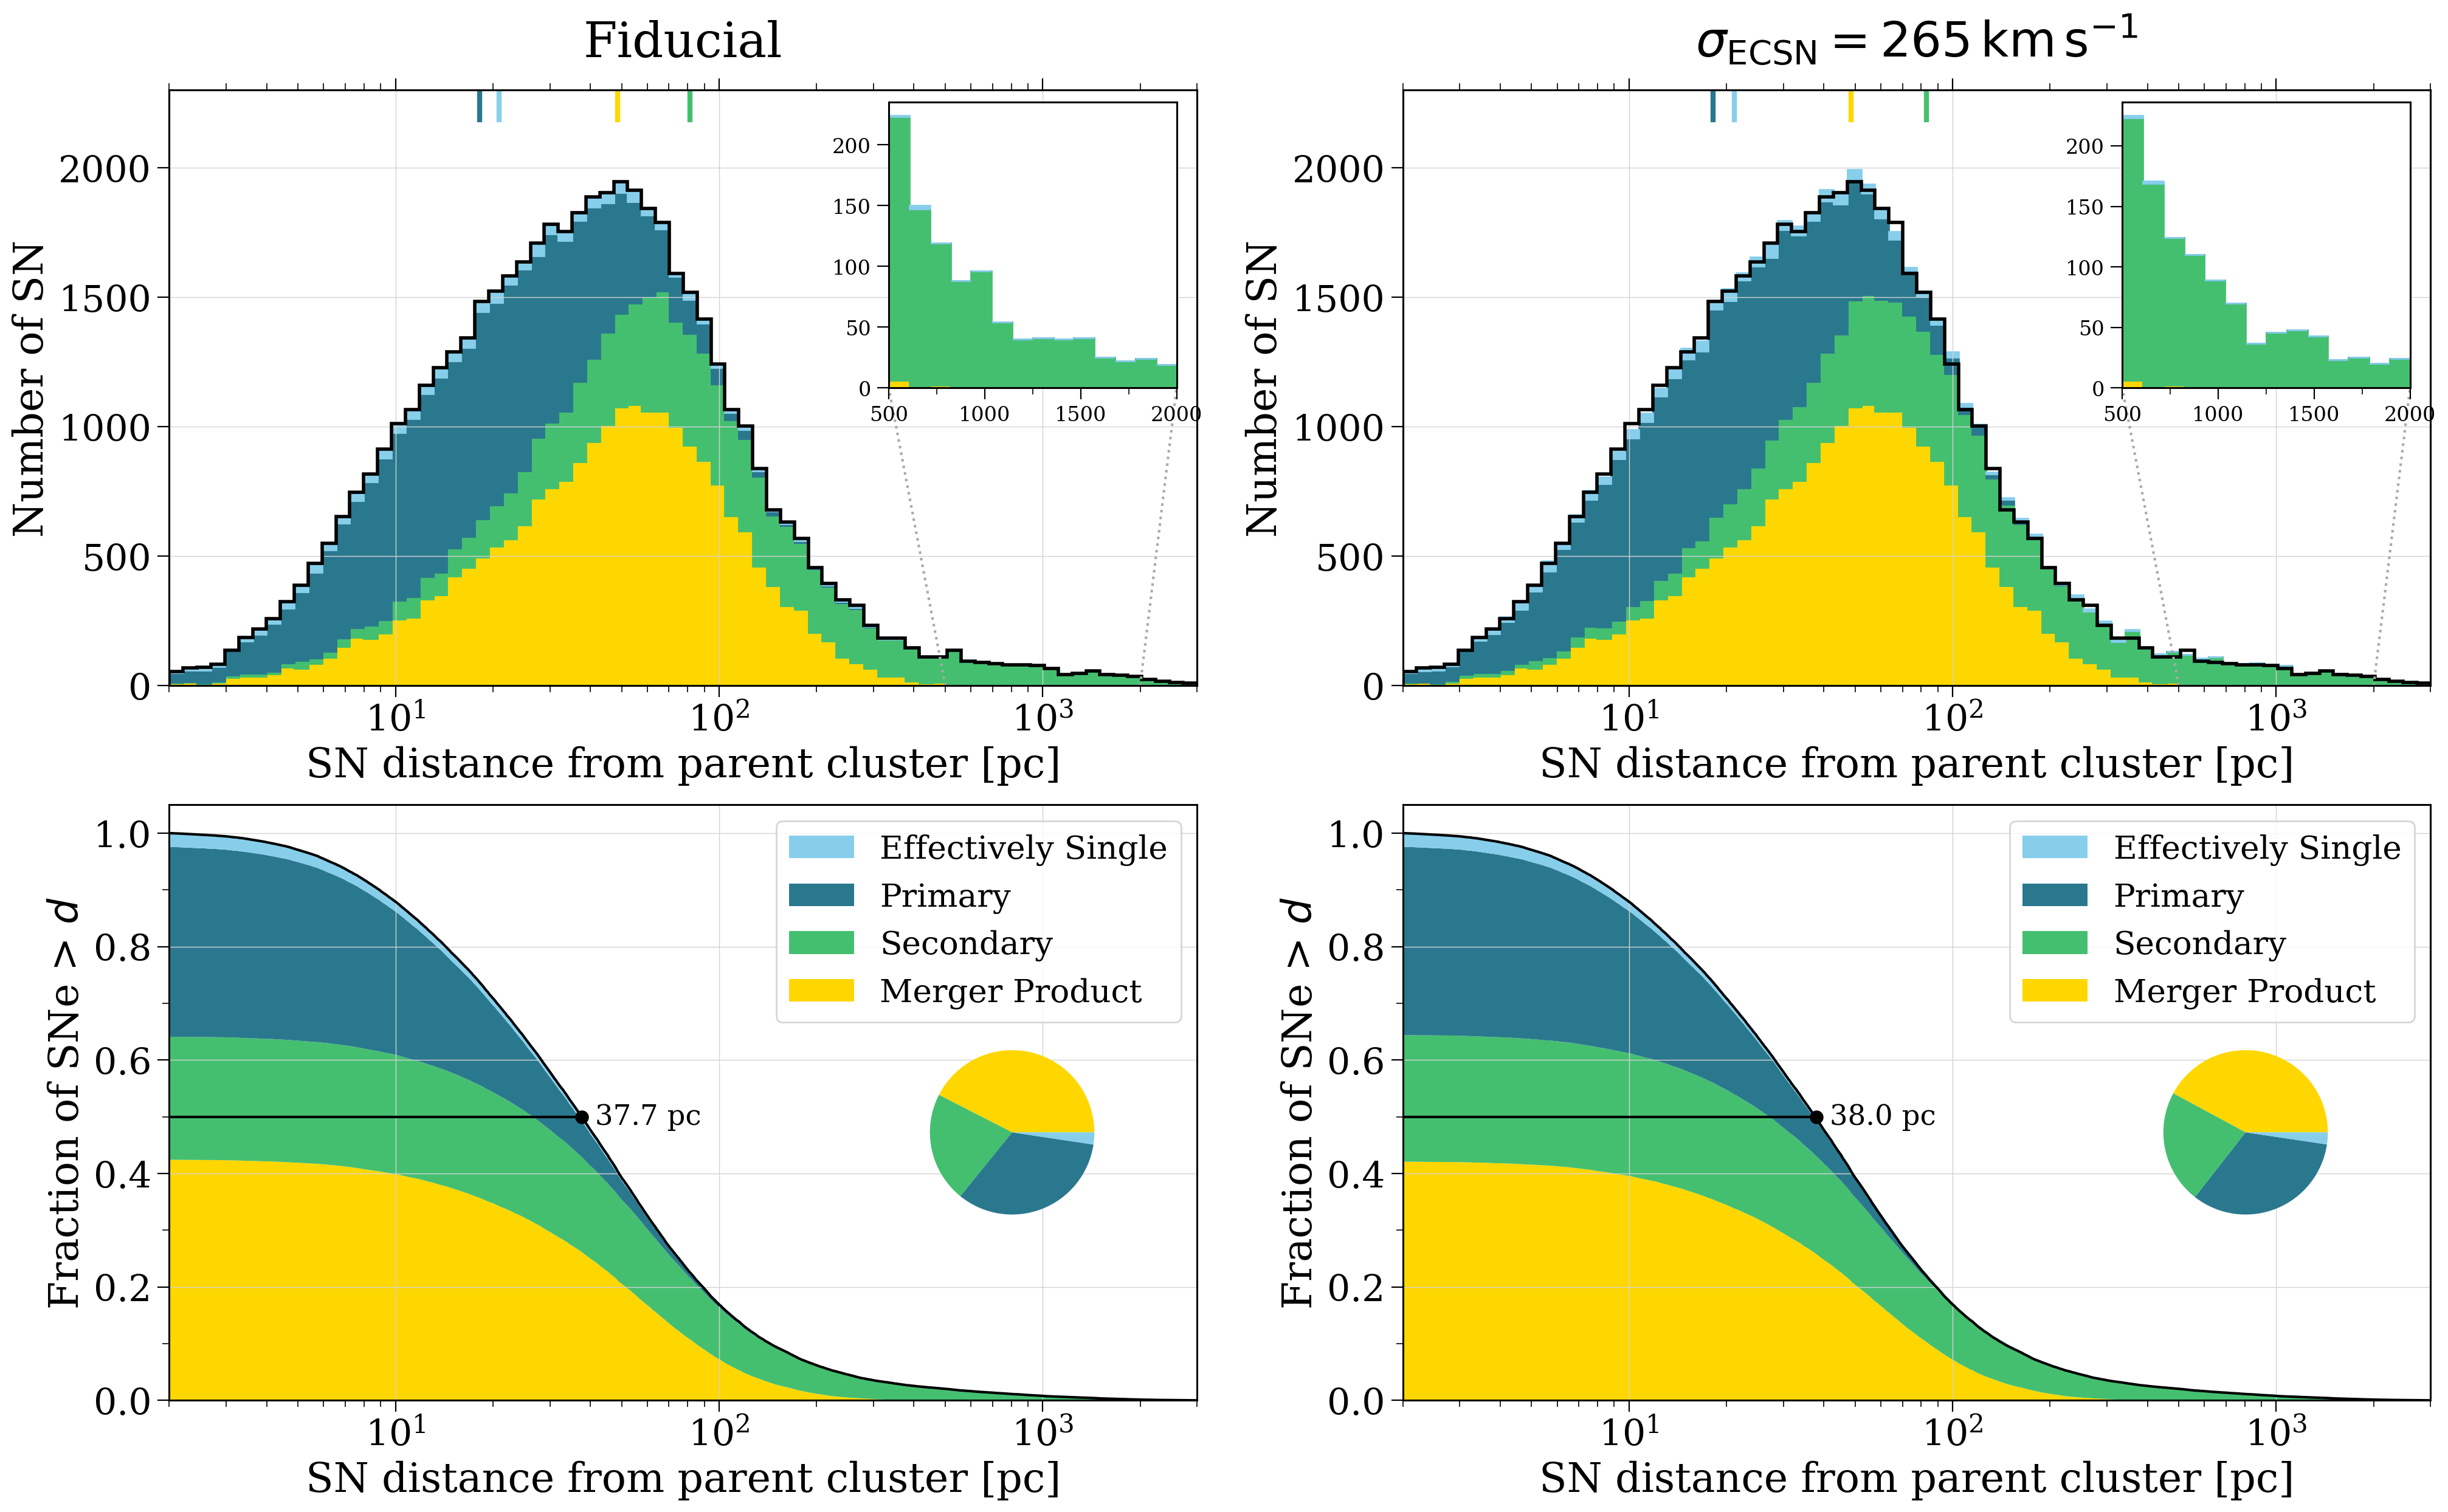

In [139]:
fig, axes = plt.subplots(2, 2, figsize=(24, 14))

for p, x, l in zip(["fiducial", "ecsn-265"],
                   [axes[:, 0], axes[:, 1]],
                   [r"Fiducial", r"$\sigma_{\rm ECSN} = 265 \, {\rm km \, s^{-1}}$"]):
    plotting.sandpile(pops[p], bins=np.geomspace(2e0, 3e3, 75),
                      comparison_pop=pops["fiducial"],
                      top_ax_dict={"ylim": (0, 2300)}, fig=fig, axes=x, show=False)
    x[0].set_title(l, fontsize=1.2 * fs, pad=20)
plt.show()

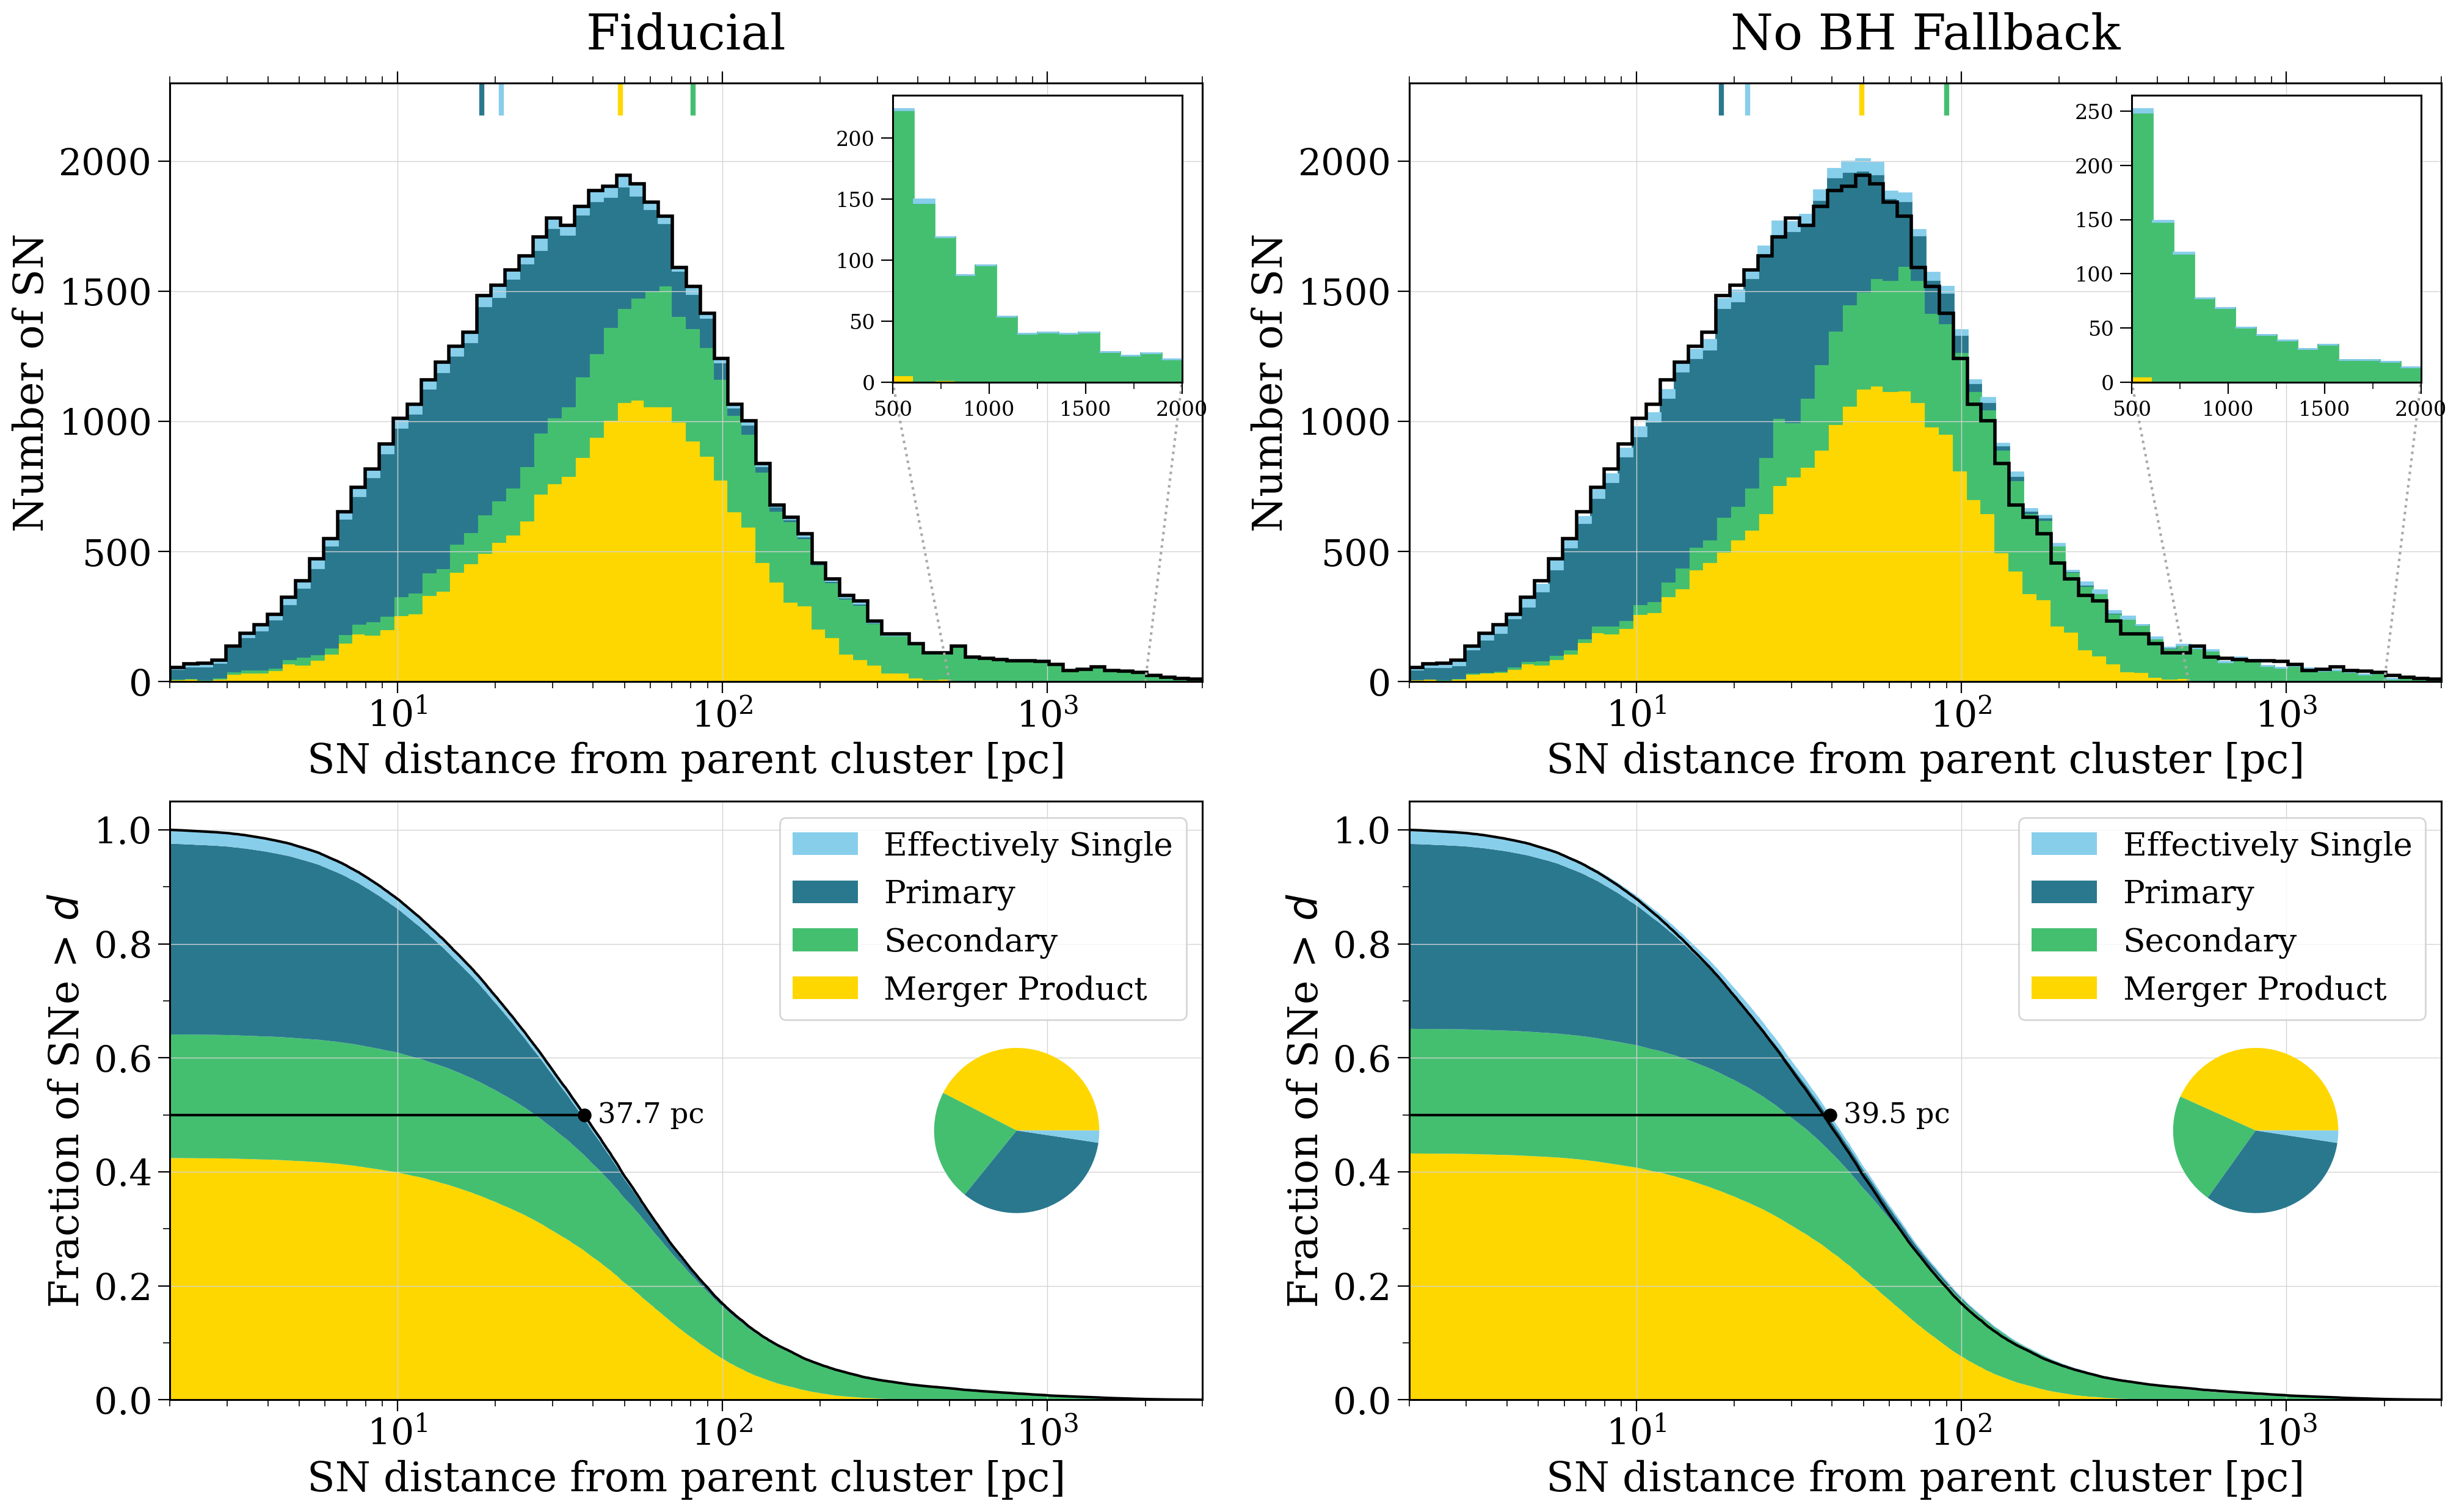

In [140]:
fig, axes = plt.subplots(2, 2, figsize=(24, 14))

for p, x, l in zip(["fiducial", "no-fallback"],
                   [axes[:, 0], axes[:, 1]],
                   [r"Fiducial", r"No BH Fallback"]):
    plotting.sandpile(pops[p], bins=np.geomspace(2e0, 3e3, 75),
                      comparison_pop=pops["fiducial"],
                      top_ax_dict={"ylim": (0, 2300)}, fig=fig, axes=x, show=False)
    x[0].set_title(l, fontsize=1.2 * fs, pad=20)
plt.show()

# Galaxy variations

In [136]:
gal_pop_file_names = ["fiducial",
                      "alpha-vir-0.1", "alpha-vir-10.0",
                      "r-0.1", "r-1.0", "r-10.0", "r-100.0"]
gal_pops = {p:pops[p] for p in gal_pop_file_names}
gal_pop_labels = pop_details["labels"][np.isin(pop_details["file_names"], gal_pop_file_names)]

/mnt/home/twagg/miniconda3/envs/cogsworth/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/home/twagg/miniconda3/envs/cogsworth/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


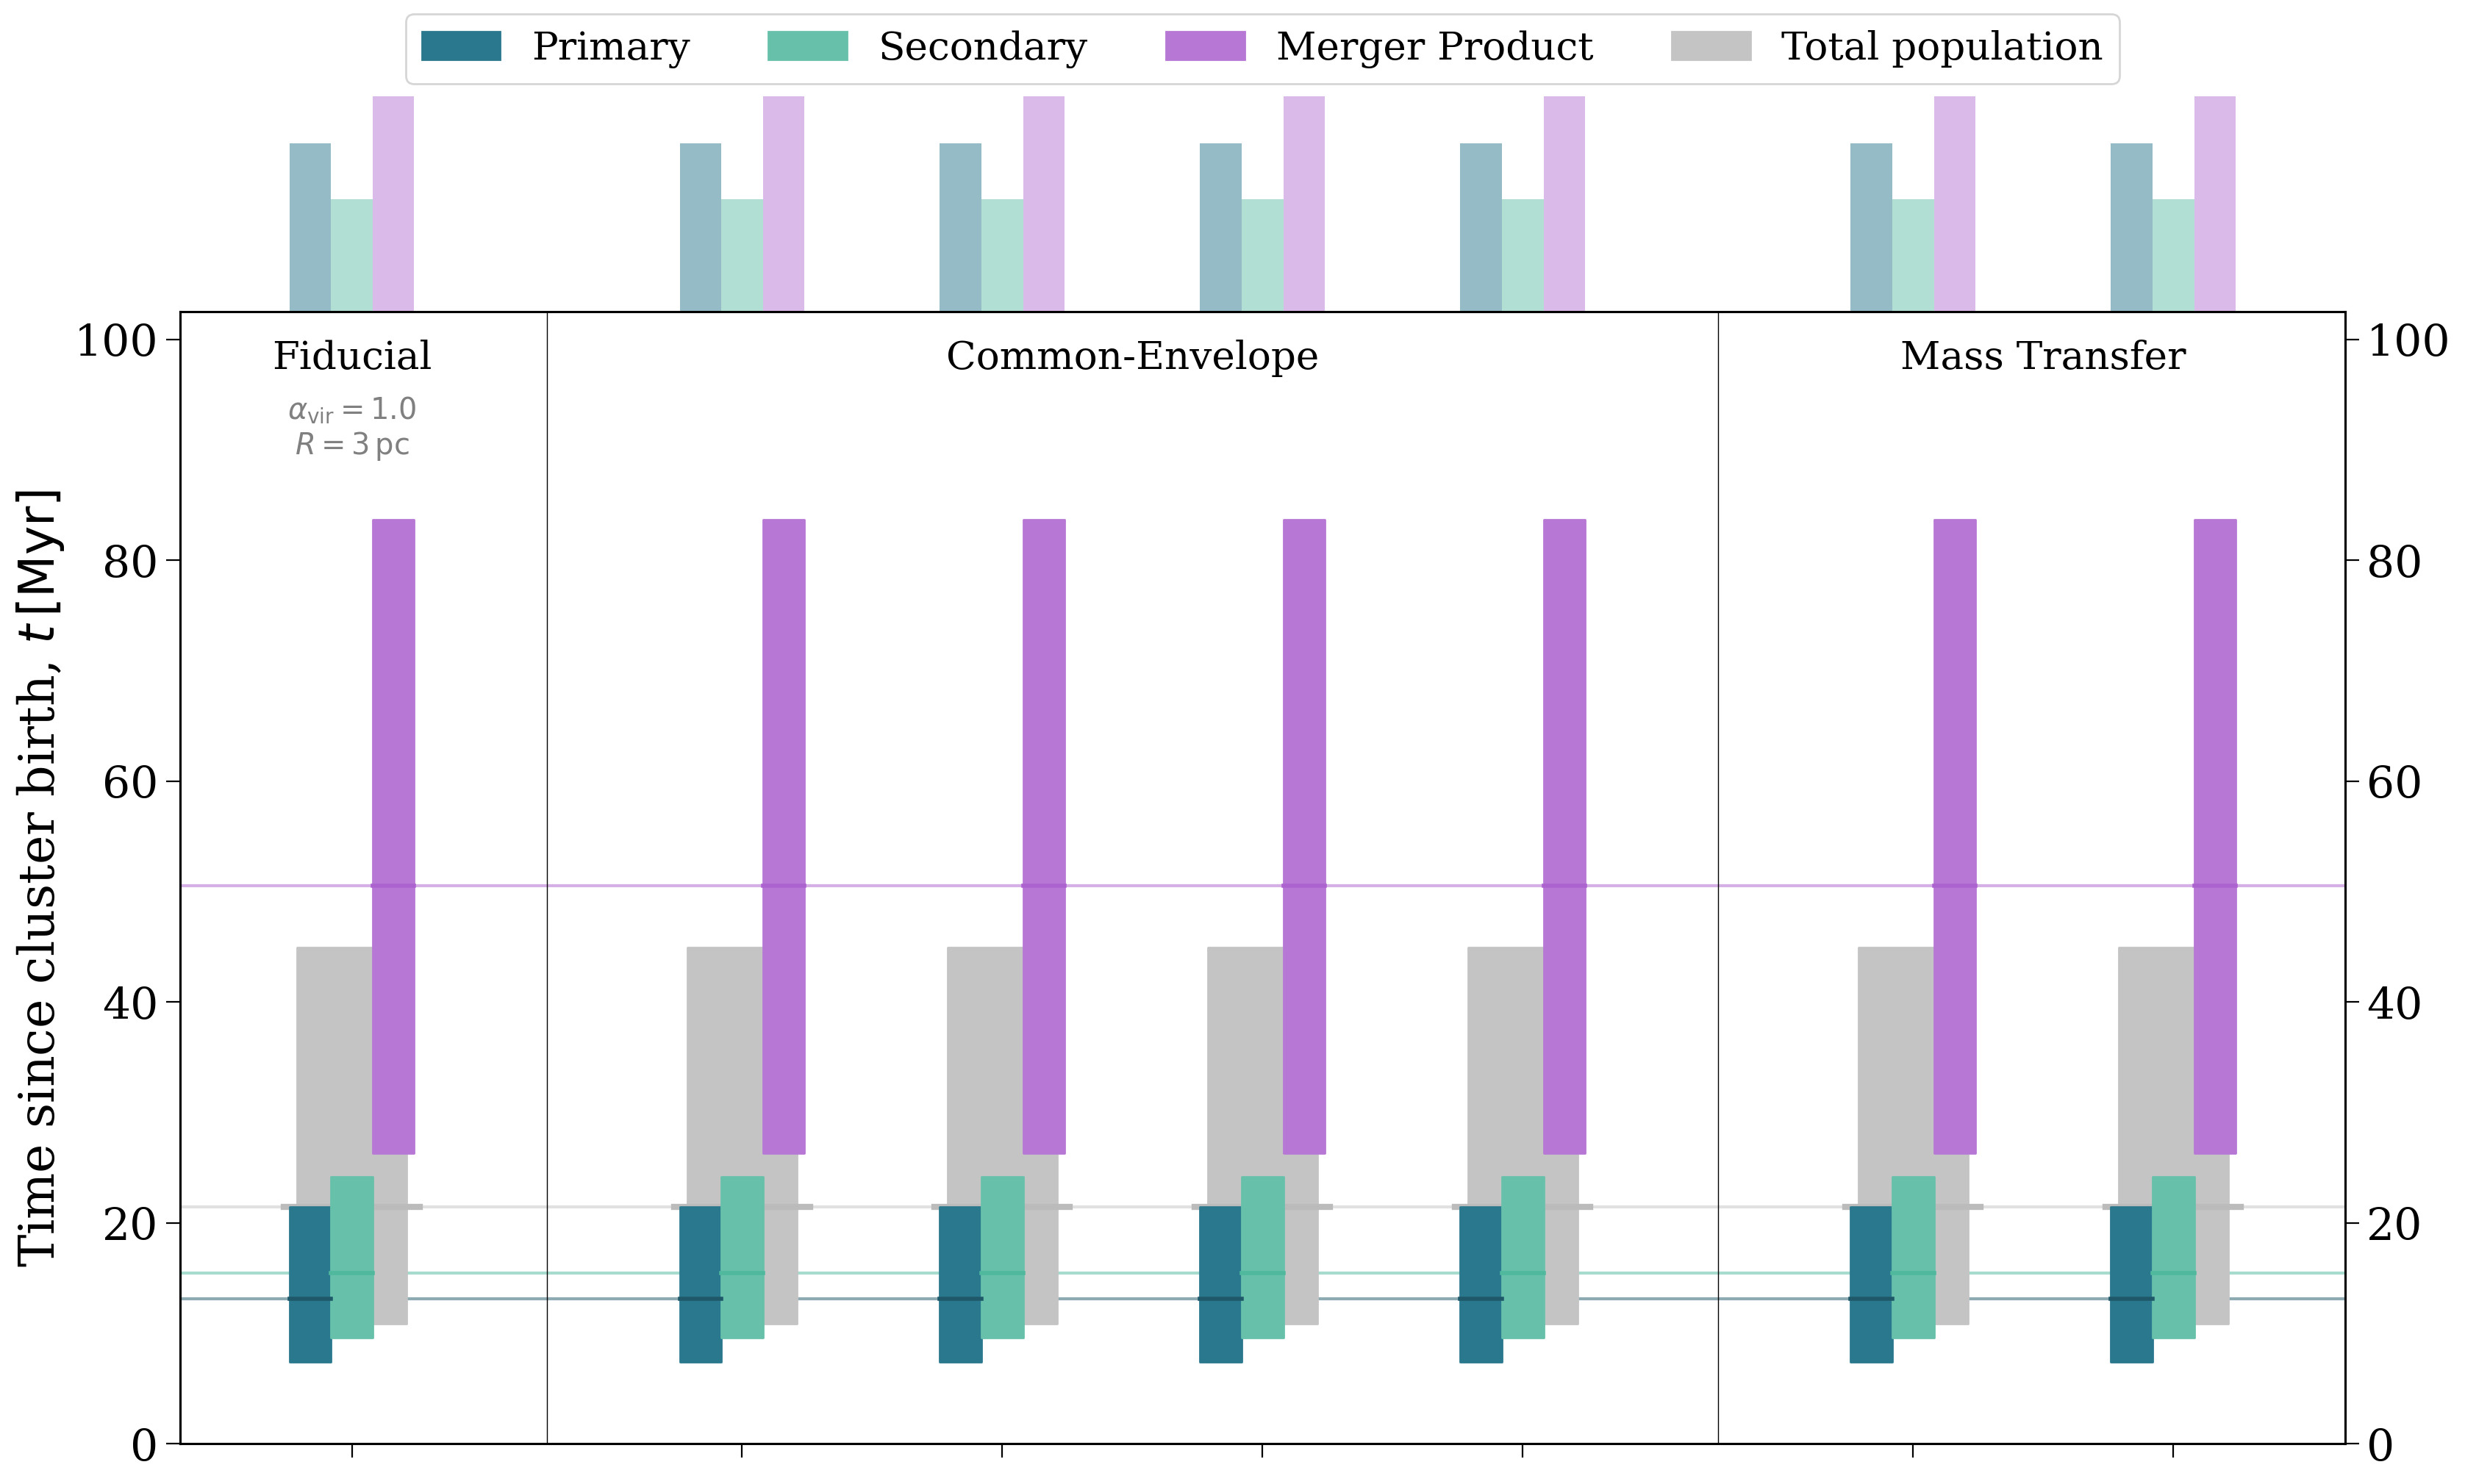

In [228]:
reload(plotting)
fig, ax = plotting.compare_variations(gal_pops, gal_pop_labels, quantity="time", annotate_loc=100,
                                      group_start_inds=[1,5,9],
                                    fiducial_settings=[r"$\alpha_{\rm vir} = 1.0$",
                                                       r"$R = 3 \, {\rm pc}$"],
                                      show=False, show_labels=False)
plt.savefig("../plots/variations/var-gal-time.pdf", format="pdf", bbox_inches="tight")
plt.show()

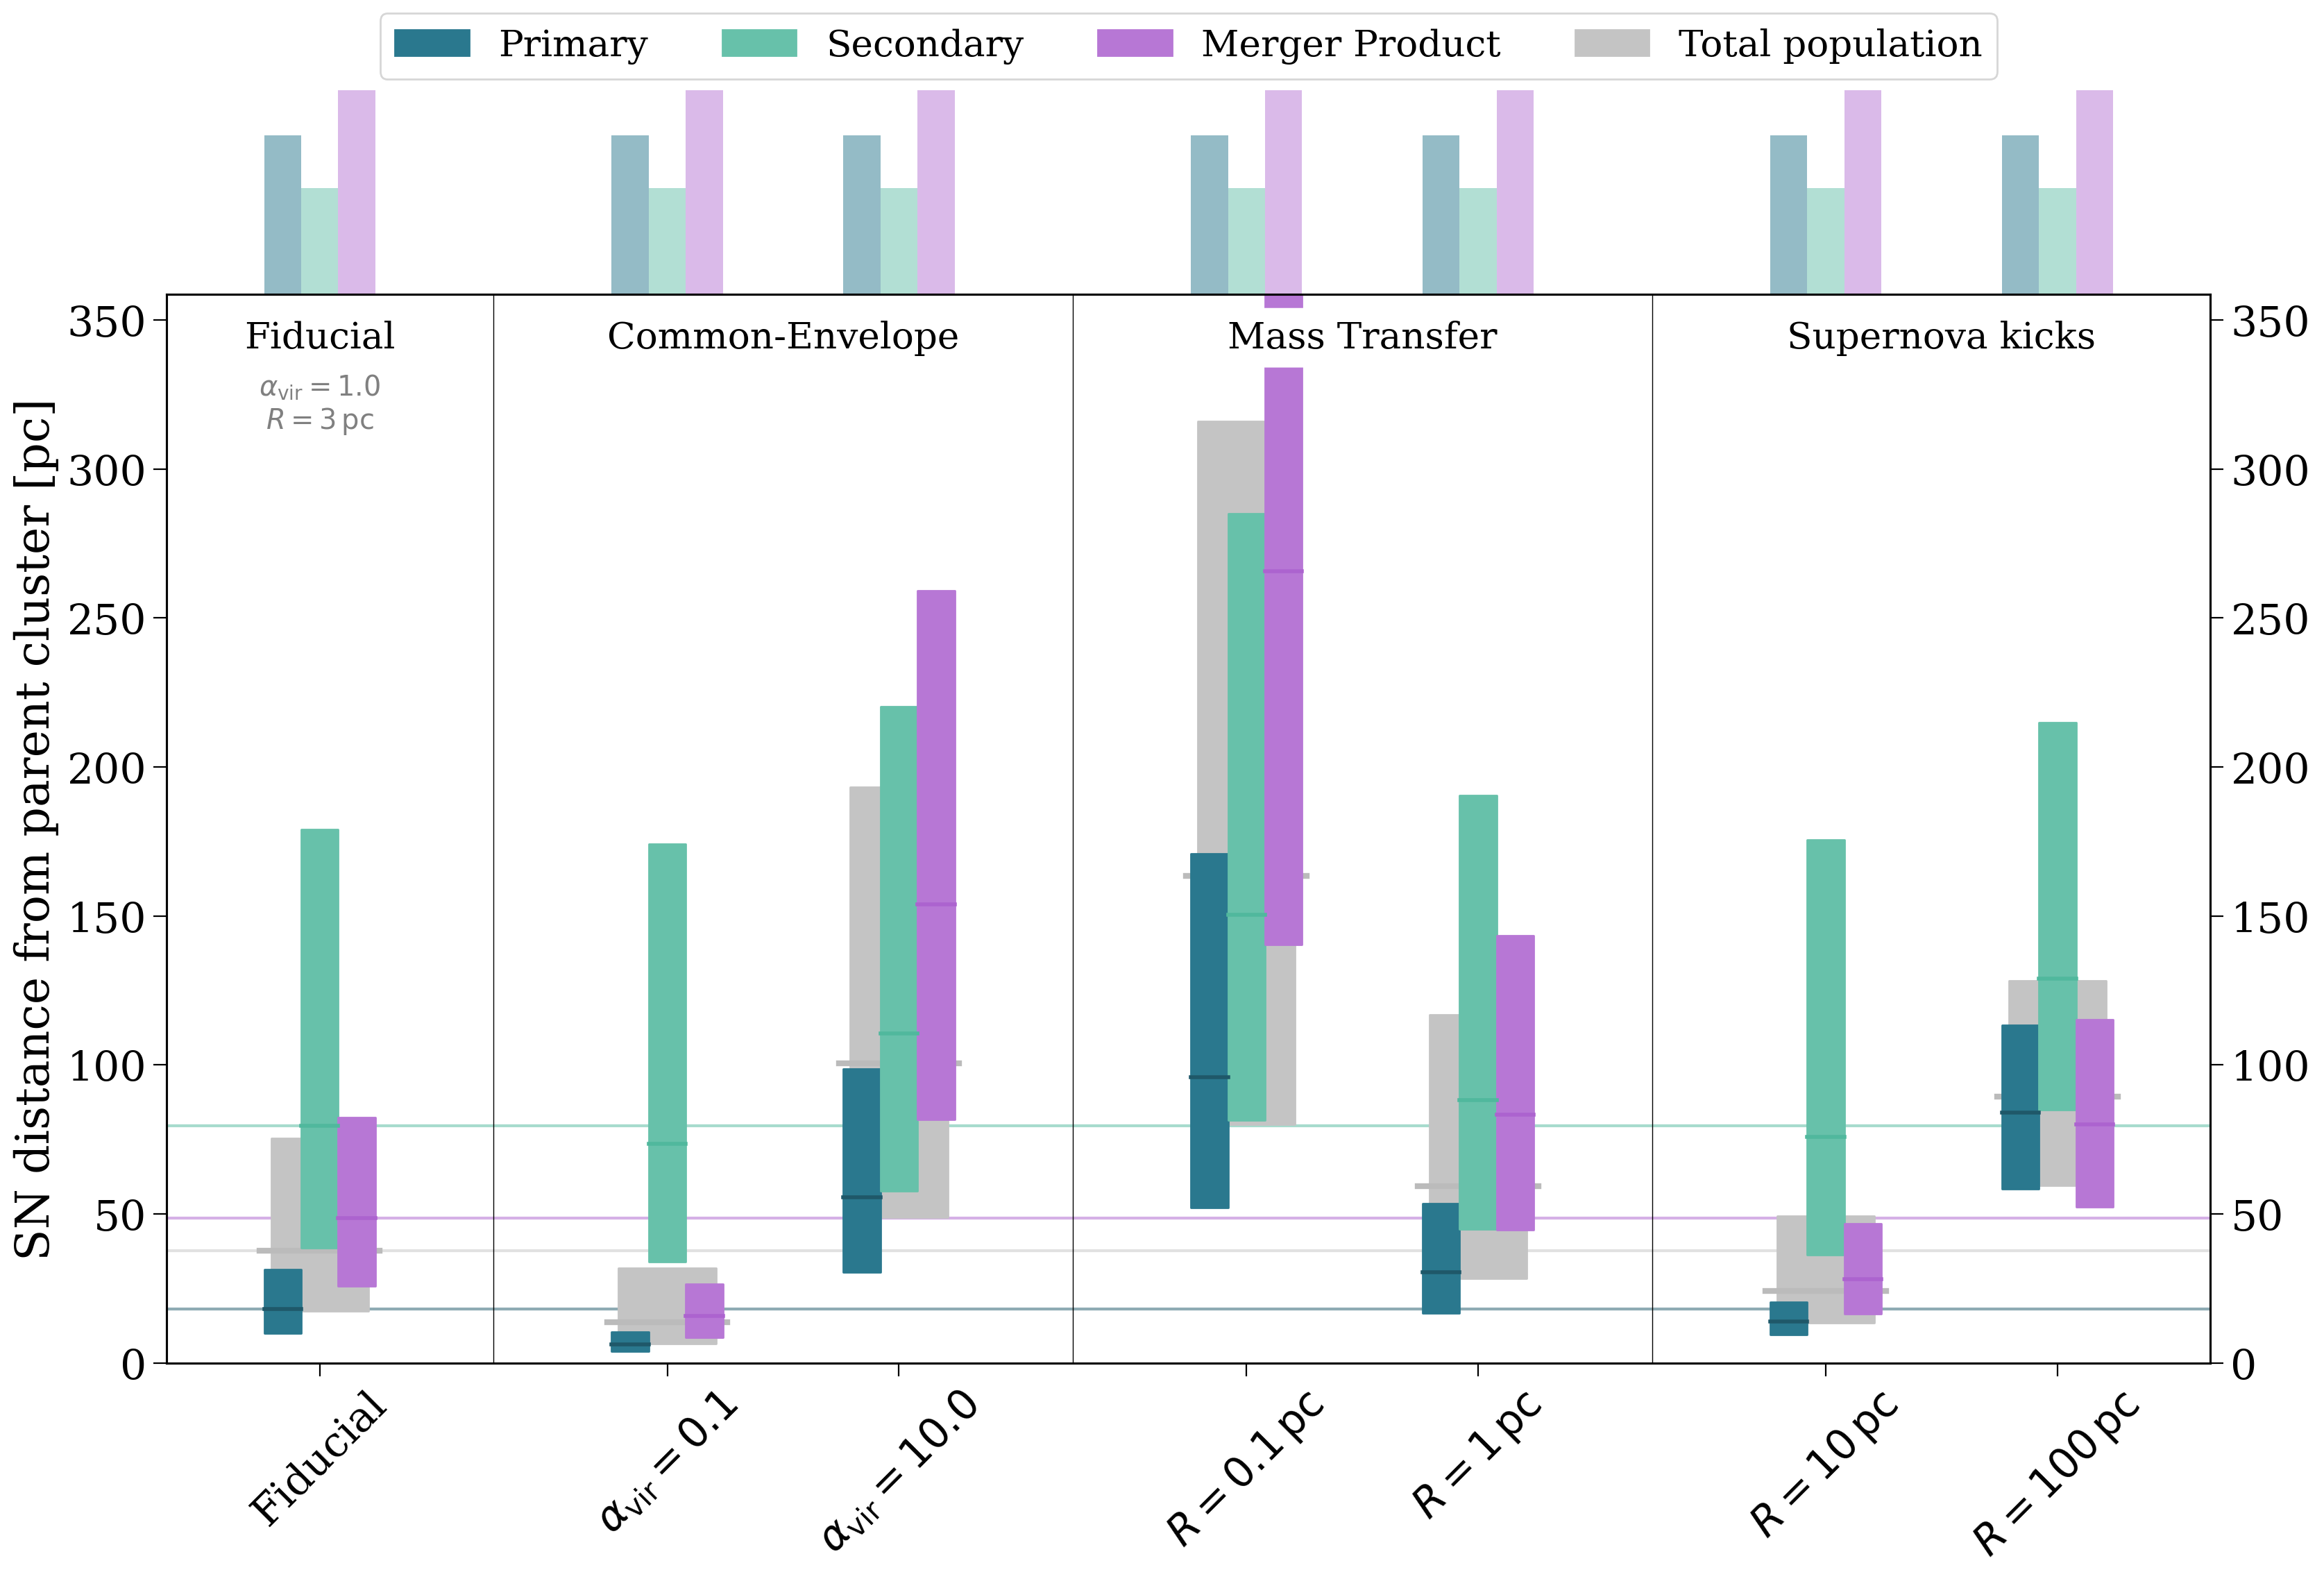

In [229]:
reload(plotting)
fig, ax = plotting.compare_variations(gal_pops, gal_pop_labels, quantity="distance", annotate_loc=350,
                                      group_start_inds=[1,3,5],
                                    fiducial_settings=[r"$\alpha_{\rm vir} = 1.0$",
                                                       r"$R = 3 \, {\rm pc}$"],
                                      show=False)#, show_rel_bars=False, show_legend=False)
plt.savefig("../plots/variations/var-gal-dist.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Initial condition variations

In [83]:
pop_details = {
    "file_names": ["fiducial", 
                   "porb-0", "porb-minus1", "q-plus1", "q-minus1",
                   "ce-0.1", "ce-10.0", "qcritB-0.0", "qcritB-1000.0",
                   "beta-0.0", "beta-0.5", "beta-1.0", "gamma-disc",
                   "ecsn-265", "no-fallback",
                   "alpha-vir-0.1", "alpha-vir-10.0",
                   "r-0.1", "r-1.0", "r-10.0", "r-100.0"],
    "labels": np.array(["Fiducial",
               r"$\pi = 0$", r"$\pi = -1$", r"$\kappa = 1$", r"$\kappa = -1$",
               r"$\alpha_{\rm CE} = 0.1$", r"$\alpha_{\rm CE} = 10.0$",
               "All Case B\nMT Unstable", "All Case B\nMT Stable",
               r"$\beta = 0.0$", r"$\beta = 0.5$",
               r"$\beta = 1.0$", r"$\gamma = \gamma_{\rm disc}$",
               r"$\sigma_{\rm low} = $" + "\n" + r"$265 \, {\rm km/s}$", "No fallback",
               r"$\alpha_{\rm vir} = 0.1$", r"$\alpha_{\rm vir} = 10.0$",
               r"$R = 0.1 \, {\rm pc}$", r"$R = 1 \, {\rm pc}$",
               r"$R = 10 \, {\rm pc}$", r"$R = 100 \, {\rm pc}$"]),
}

In [143]:
ini_pop_file_names = ["fiducial", 
                      "porb-0", "porb-minus1",
                      "q-plus1", "q-minus1"]
ini_pops = {p:pops[p] for p in ini_pop_file_names}
ini_pop_labels = pop_details["labels"][np.isin(pop_details["file_names"], ini_pop_file_names)]

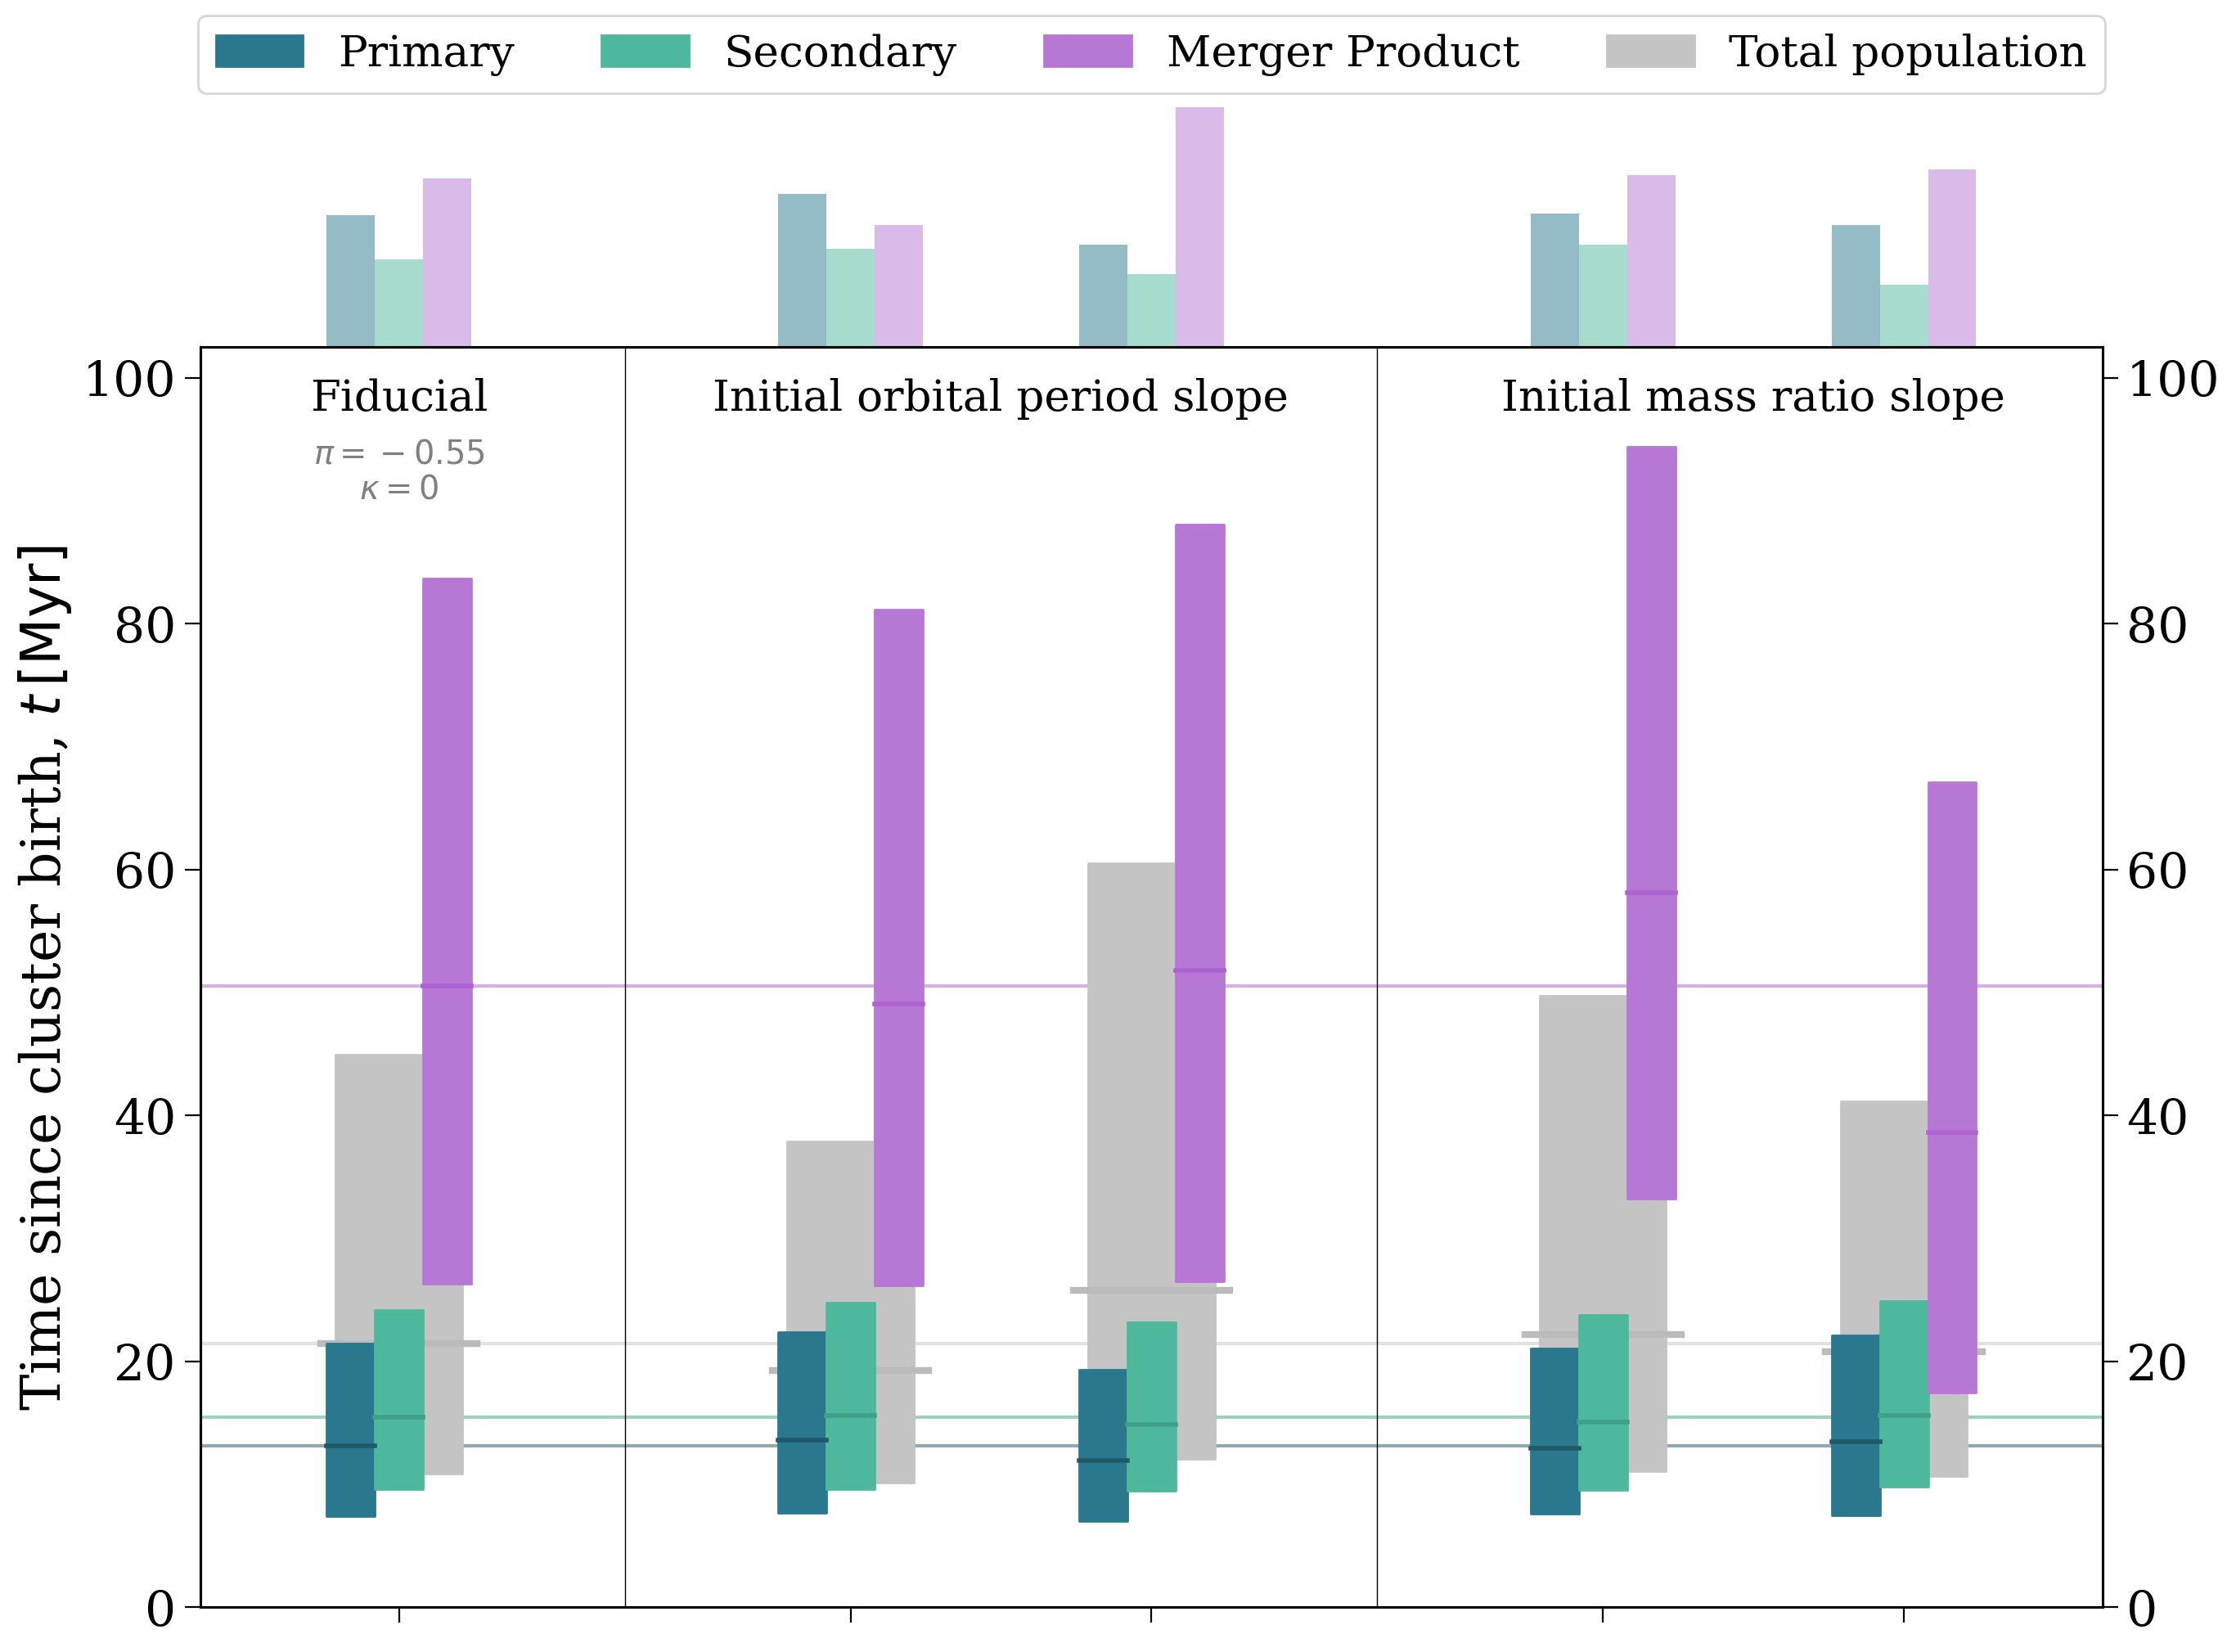

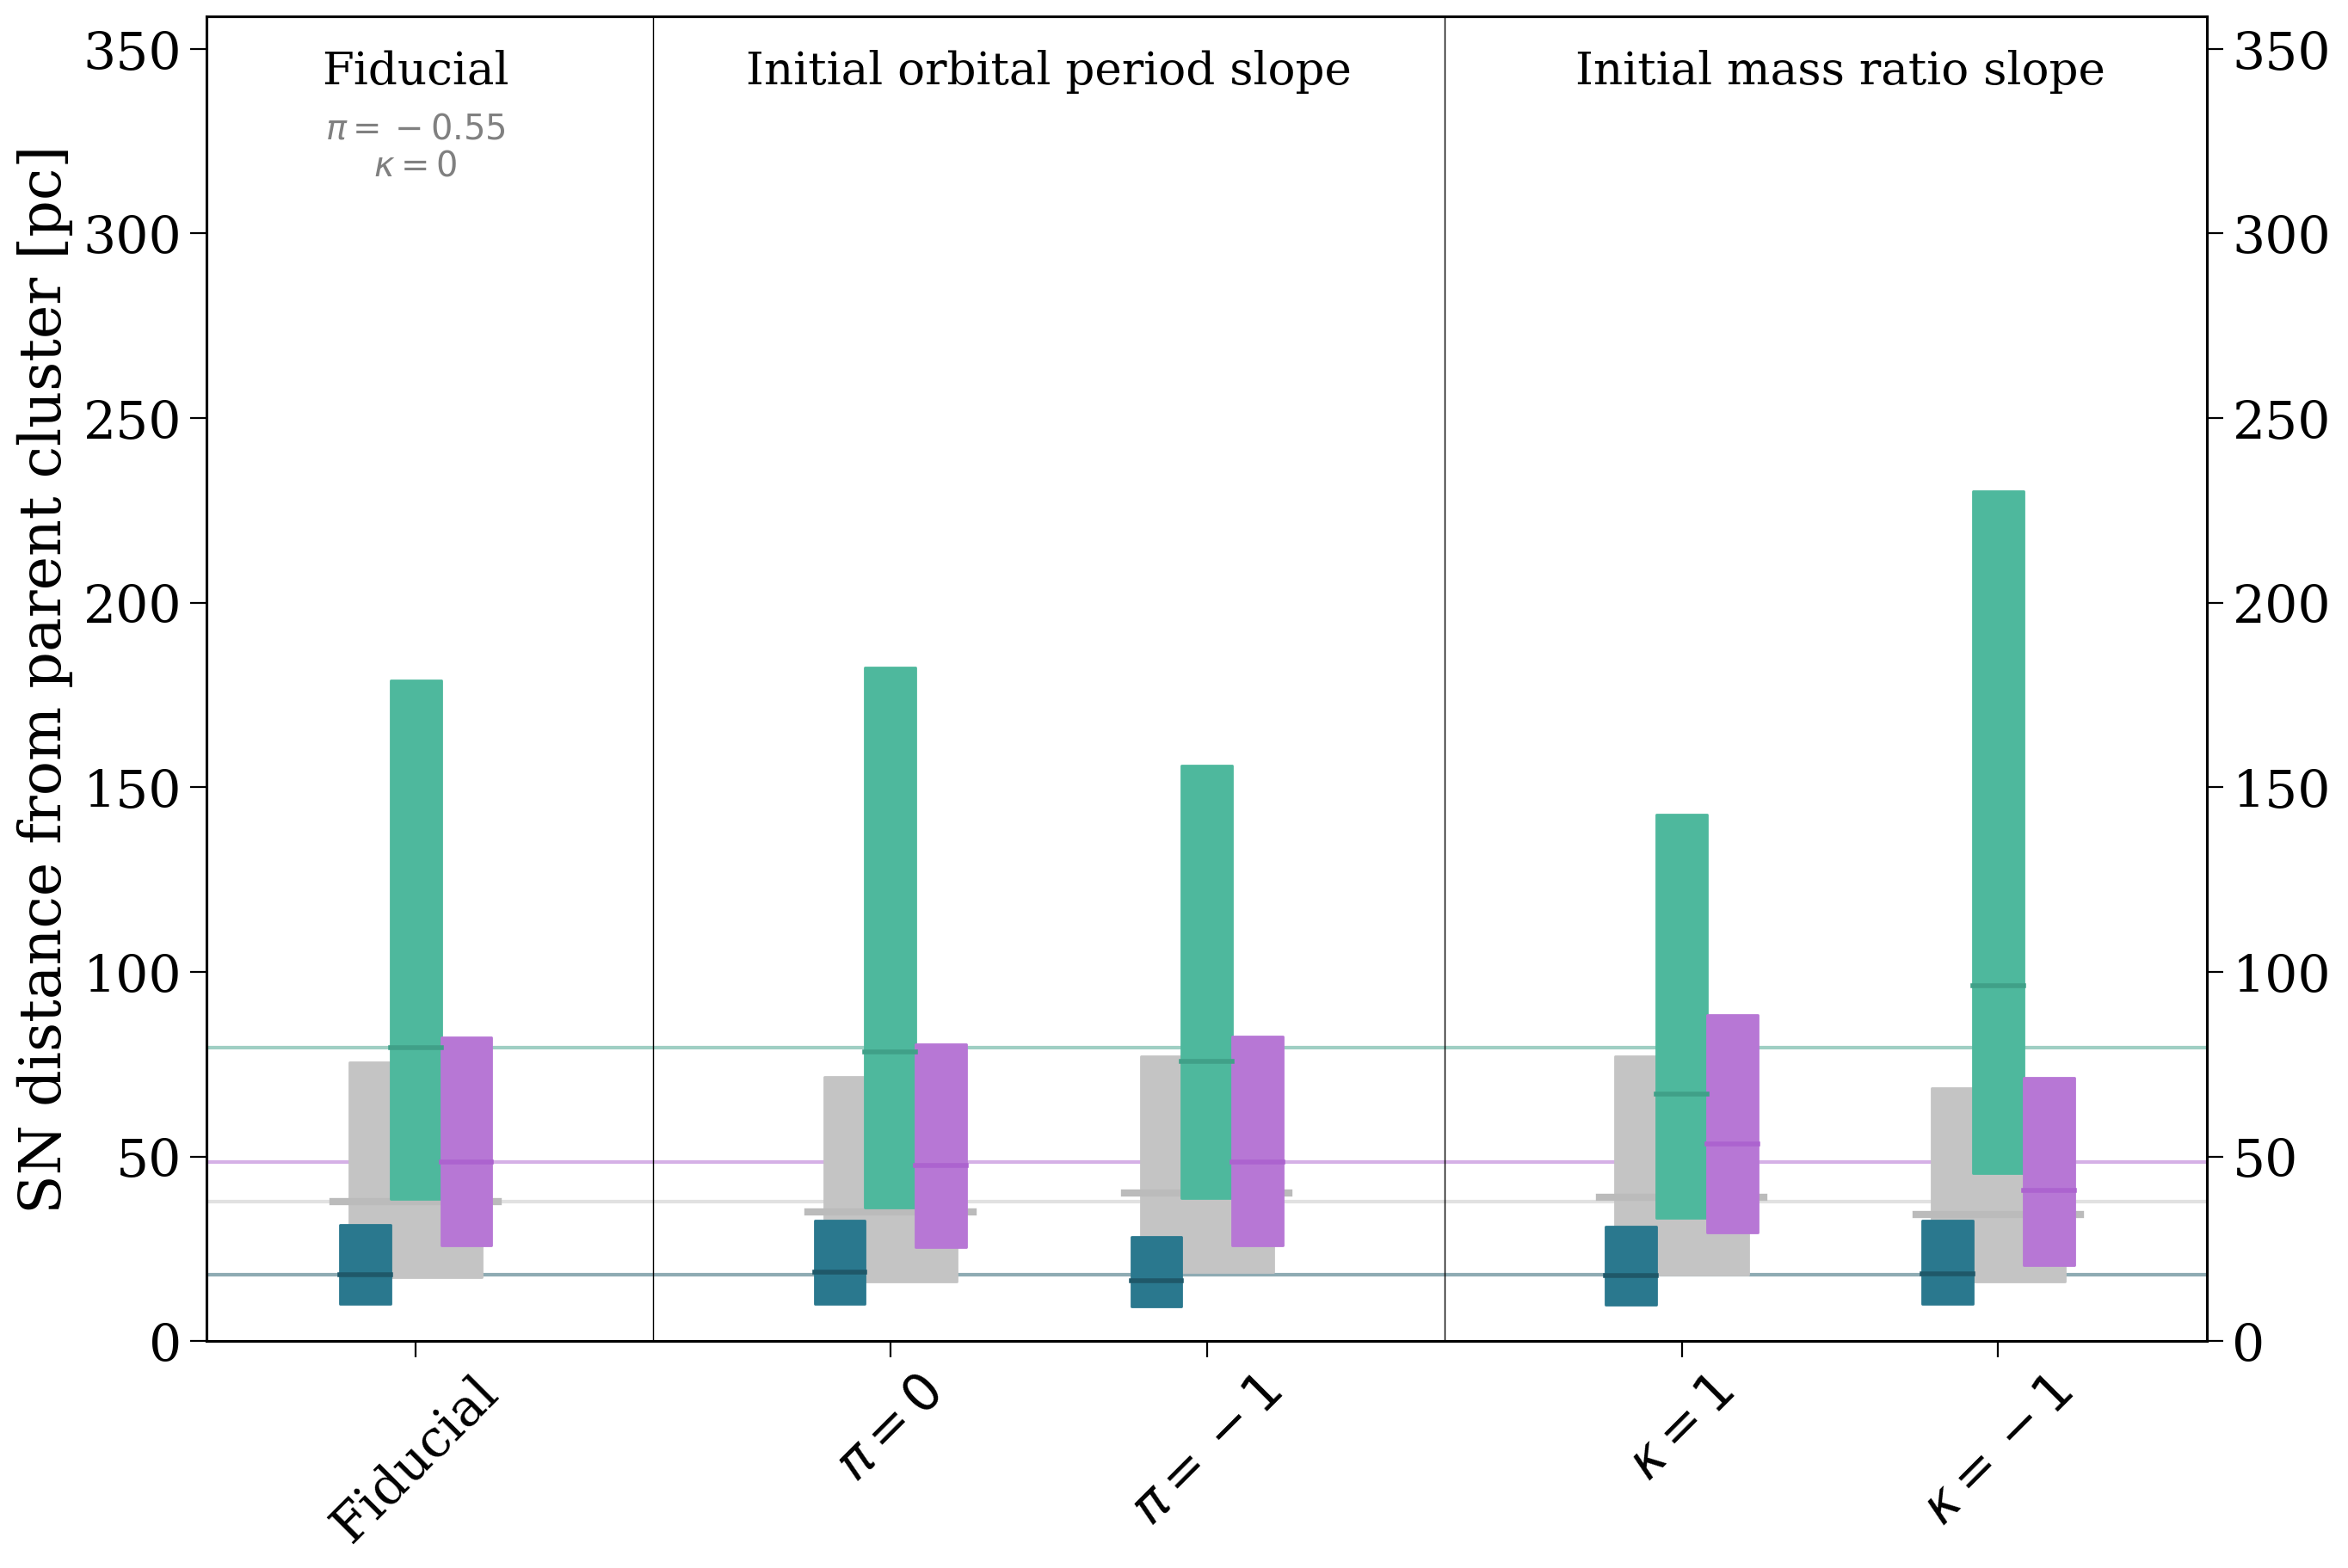

In [230]:
reload(plotting)
fig, ax = plotting.compare_variations(ini_pops, ini_pop_labels, quantity="time", annotate_loc=100,
                                      group_start_inds=[1,3], figwidth=15,
                                      group_labels=["Fiducial", "Initial orbital period slope", "Initial mass ratio slope"],
                                      fiducial_settings=[r"$\pi=-0.55$", r"$\kappa=0$"],
                                      show=False, show_labels=False)
plt.savefig("../plots/variations/var-ini-time.pdf", format="pdf", bbox_inches="tight")
plt.show()

reload(plotting)
fig, ax = plotting.compare_variations(ini_pops, ini_pop_labels, quantity="distance", annotate_loc=350,
                                      group_start_inds=[1,3], figwidth=15,
                                      group_labels=["Fiducial", "Initial orbital period slope", "Initial mass ratio slope"],
                                      fiducial_settings=[r"$\pi=-0.55$", r"$\kappa=0$"],
                                      show=False, show_rel_bars=False, show_legend=False)
plt.savefig("../plots/variations/var-ini-dist.pdf", format="pdf", bbox_inches="tight")
plt.show()